<a href="https://colab.research.google.com/github/DenisGubanov/MORE-Tech-3.0-VTB-team-solution-DUCK/blob/main/HR%20data%20science%20dataset%20analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import ceil, sqrt as root
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectFromModel
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNetCV, LassoCV 
from sklearn.ensemble import RandomForestRegressor
import warnings
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_set = pd.read_csv("train.csv")
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_set = pd.read_csv("test.csv")
test_set.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
set(train_set.columns) - set(test_set.columns)

{'SalePrice'}

In [ ]:
sample = pd.read_csv("sample_submission.csv")

In [ ]:
train_set["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice distribution')

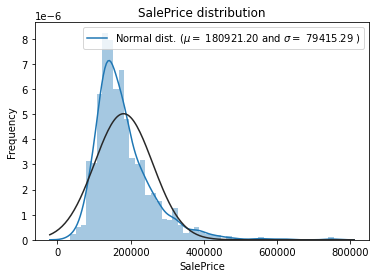

In [ ]:
sns.distplot(train_set['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train_set['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Text(0.5, 1.0, 'SalePrice distribution')

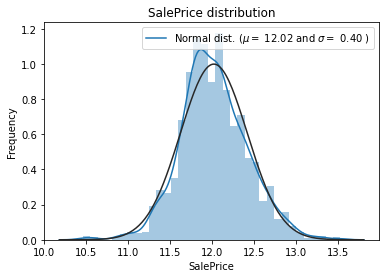

In [ ]:


price = np.log1p(train_set["SalePrice"])
 
sns.distplot(price , fit=norm);
(mu, sigma) = norm.fit(price)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')



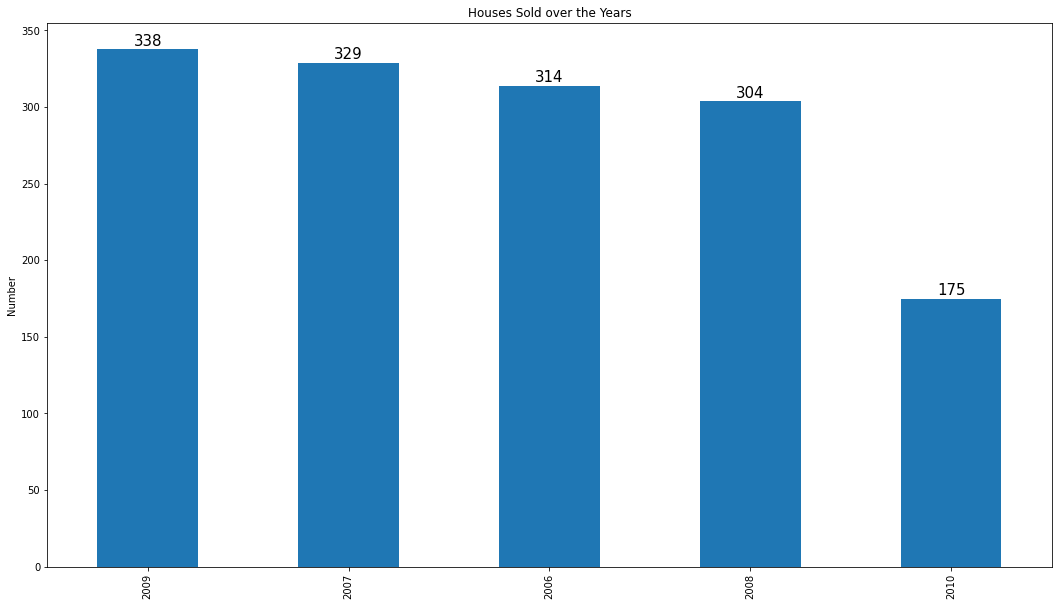

In [ ]:
plt.figure(figsize=(18,10))
plots = train_set["YrSold"].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Houses Sold over the Years")
plt.ylabel("Number")
plt.show()

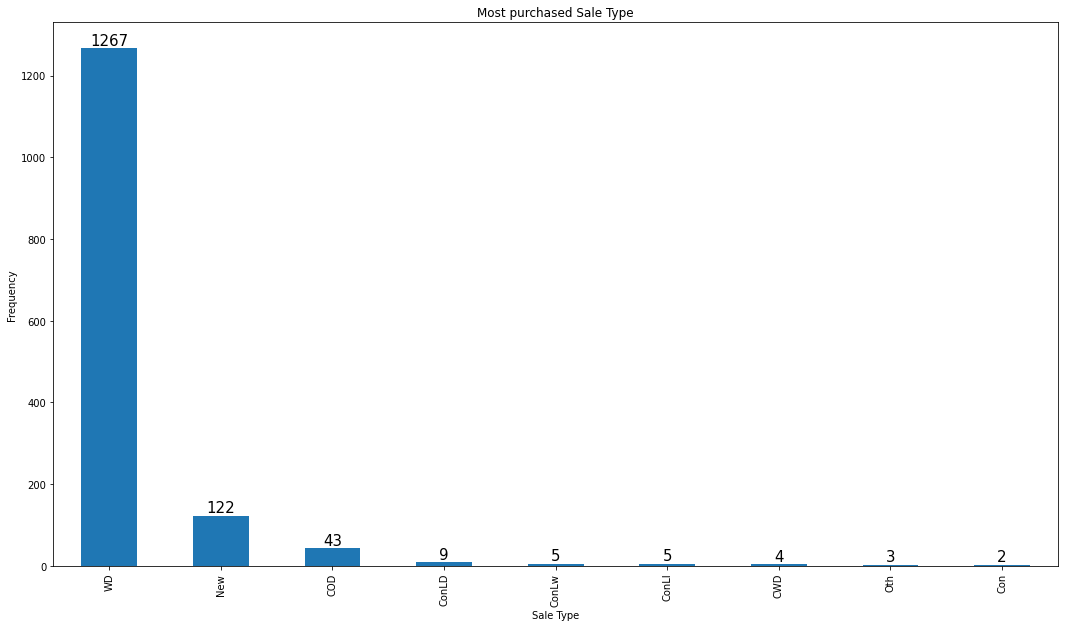

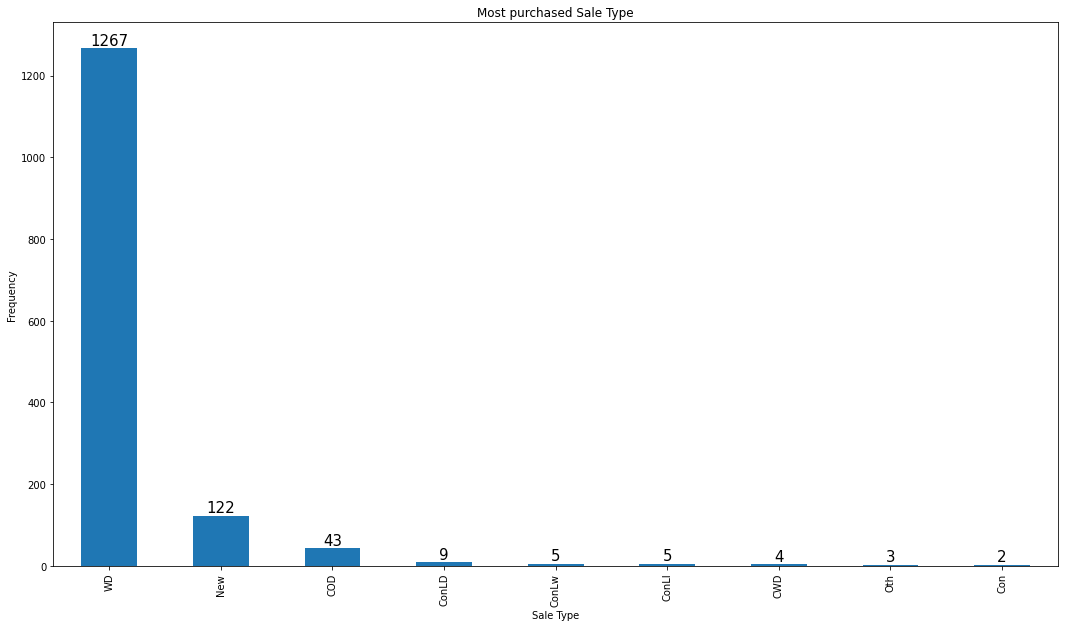

In [ ]:
plt.figure(figsize=(18,10))
plots = train_set["SaleType"].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Most purchased Sale Type")
plt.ylabel("Frequency")
plt.xlabel("Sale Type")
plt.show()
plt.figure(figsize=(18,10))
plots = train_set["SaleType"].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Most purchased Sale Type")
plt.ylabel("Frequency")
plt.xlabel("Sale Type")
plt.show()

In [ ]:
train_set.groupby(["YrSold", "MoSold"]).count()

Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
YrSold MoSold                            ...                                    
2006   1       10          10        10  ...        10             10         10
       2        9           9         9  ...         9              9          9
       3       25          25        25  ...        25             25         25
       4       27          27        27  ...        27             27         27
       5       38          38        38  ...        38             38         38
       6       48          48        48  ...        48             48         48
       7       67          67        67  ...        67             67         67
       8       23          23        23  ...        23             23         23
       9       15          15        15  ...        15             15         15
       10      24          24        24  ...        24             24         24
       11      16          16        16  ...        16             16         16
       12      12          12        12  ...        12             12         12
2007   1       13          13        13  ...        13             13         13
       2        8           8         8  ...         8              8          8
       3       23          23        23  ...        23             23         23
       4       23          23        23  ...        23             23         23
       5       43          43        43  ...        43             43         43
       6       59          59        59  ...        59             59         59
       7       51          51        51  ...        51             51         51
       8       40          40        40  ...        40             40         40
       9       11          11        11  ...        11             11         11
       10      16          16        16  ...        16             16         16
       11      24          24        24  ...        24             24         24
       12      18          18        18  ...        18             18         18
2008   1       13          13        13  ...        13             13         13
       2       10          10        10  ...        10             10         10
       3       18          18        18  ...        18             18         18
       4       26          26        26  ...        26             26         26
       5       38          38        38  ...        38             38         38
       6       51          51        51  ...        51             51         51
       7       49          49        49  ...        49             49         49
       8       29          29        29  ...        29             29         29
       9       17          17        17  ...        17             17         17
       10      22          22        22  ...        22             22         22
       11      17          17        17  ...        17             17         17
       12      14          14        14  ...        14             14         14
2009   1       12          12        12  ...        12             12         12
       2       10          10        10  ...        10             10         10
       3       19          19        19  ...        19             19         19
       4       26          26        26  ...        26             26         26
       5       37          37        37  ...        37             37         37
       6       59          59        59  ...        59             59         59
       7       61          61        61  ...        61             61         61
       8       30          30        30  ...        30             30         30
       9       20          20        20  ...        20             20         20
       10      27          27        27  ...        27             27         27
       11      22          22        22  ...        22             22         22
       12      15          15        15  ...  

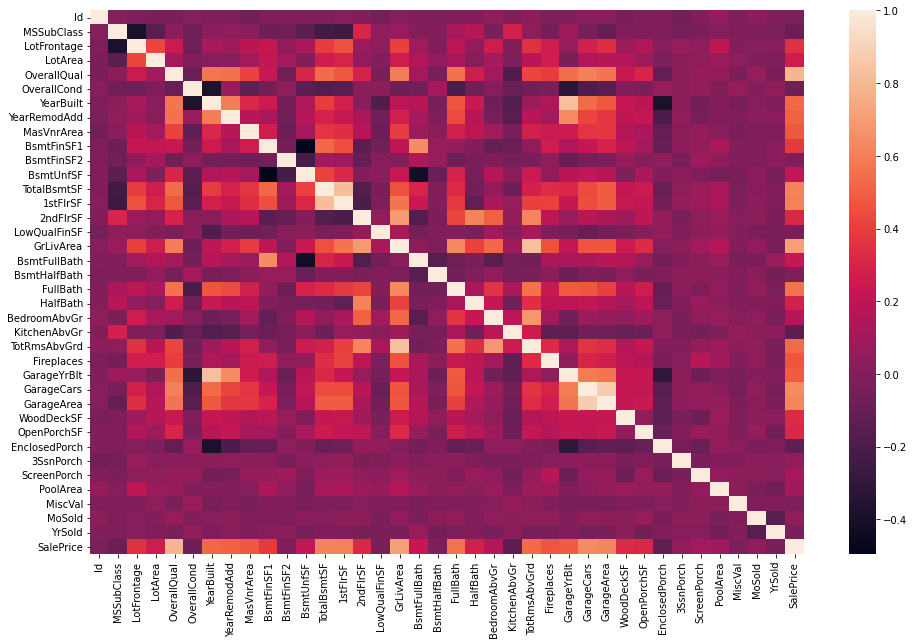

In [ ]:
corr = train_set.corr()
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(corr)

In [ ]:
date_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

def change_dates(df):
    data = df.copy()    
    for feature in date_features:
        data[feature] = data['YrSold'] - data[feature]
    
    return data

In [ ]:
df = change_dates(train_set.copy().drop("SalePrice", axis=1))
numeric_feats = df.dtypes[df.dtypes != "object"].index

In [ ]:
numeric_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

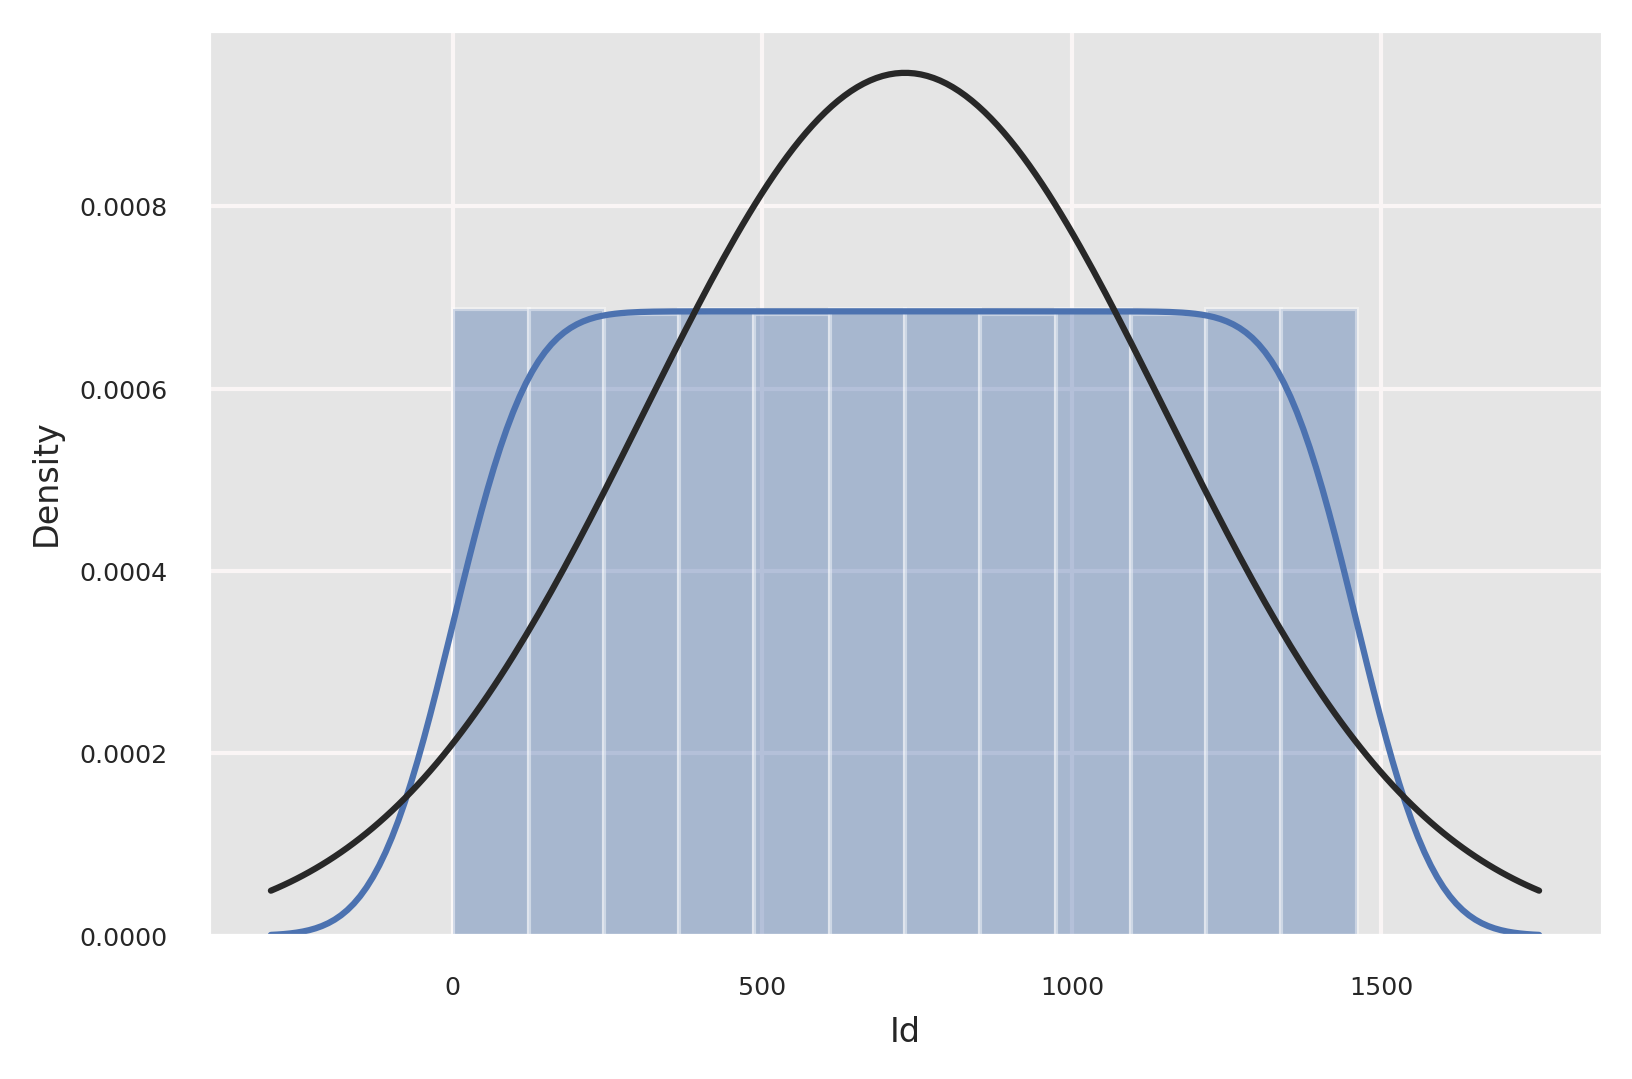

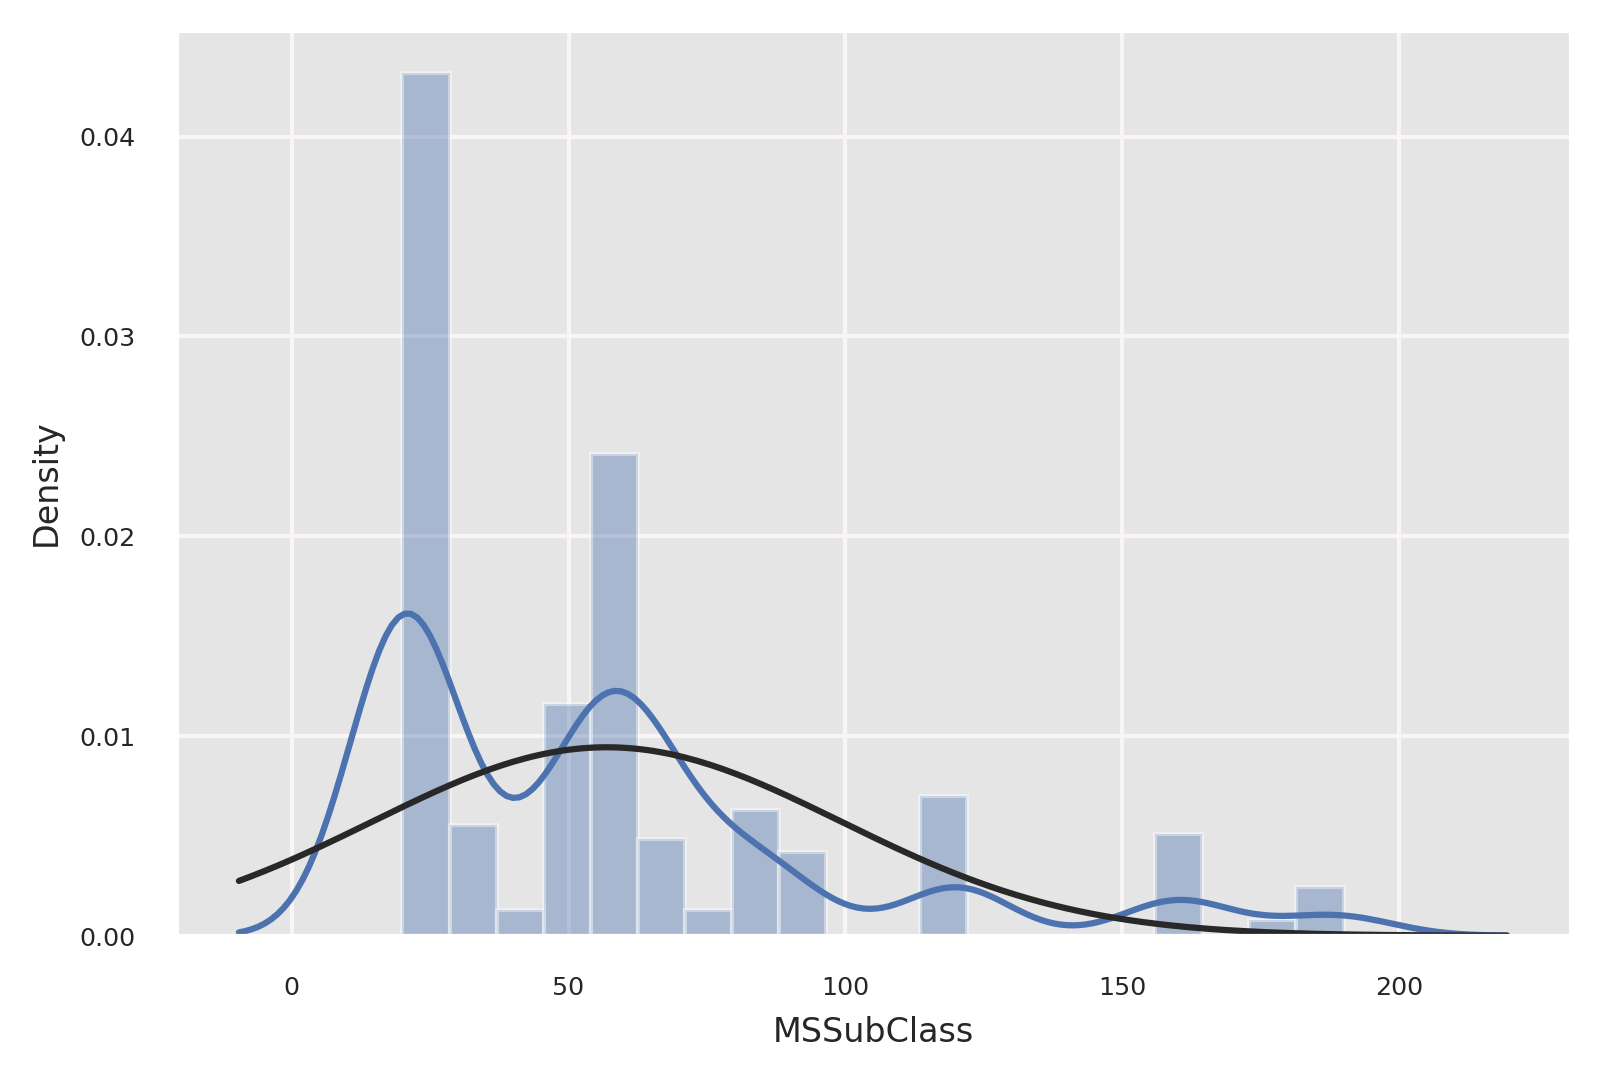

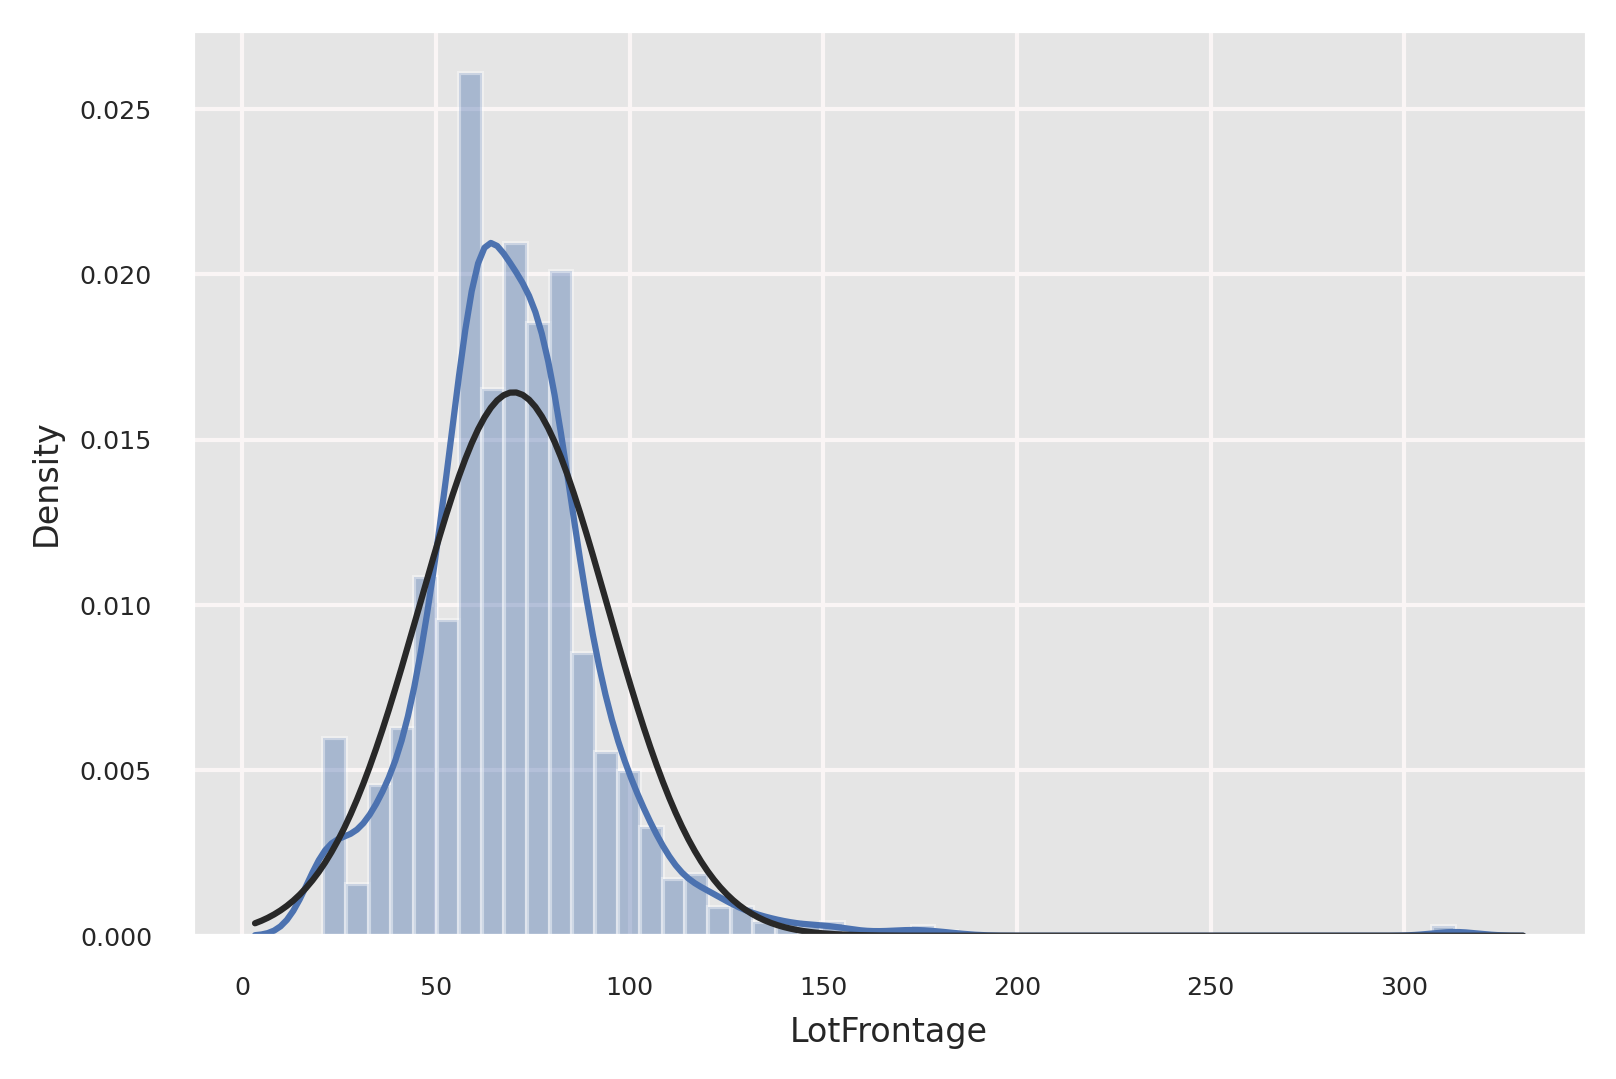

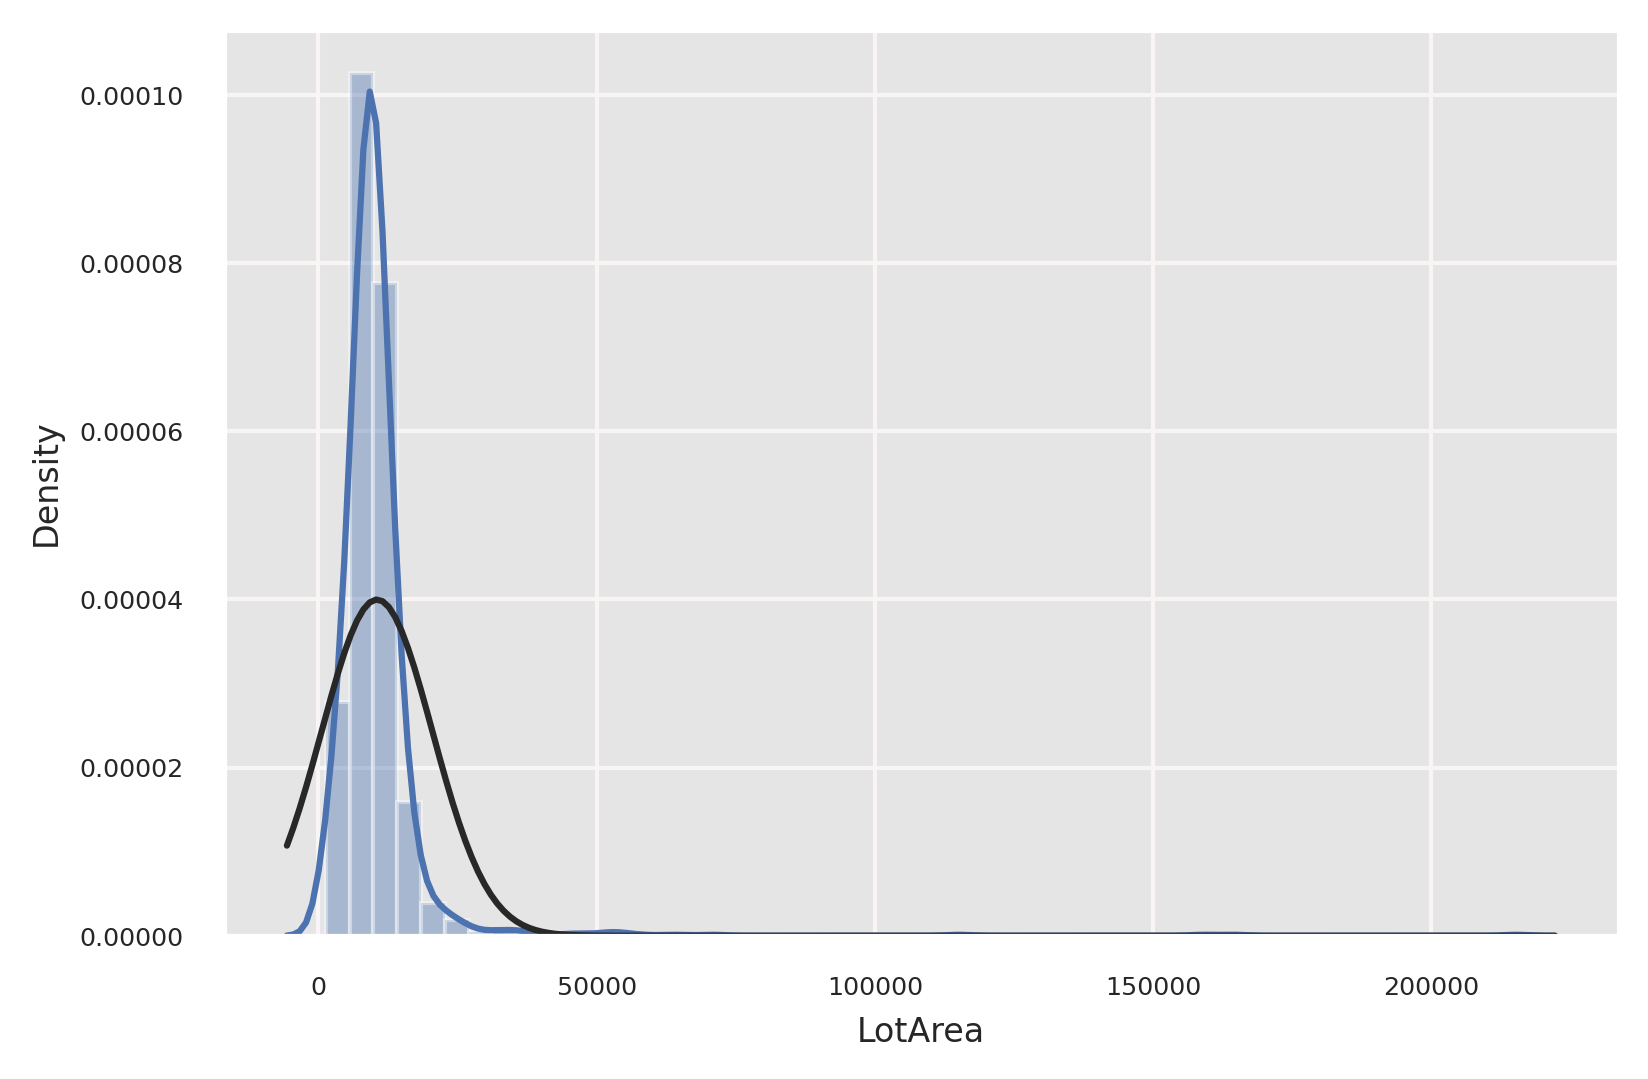

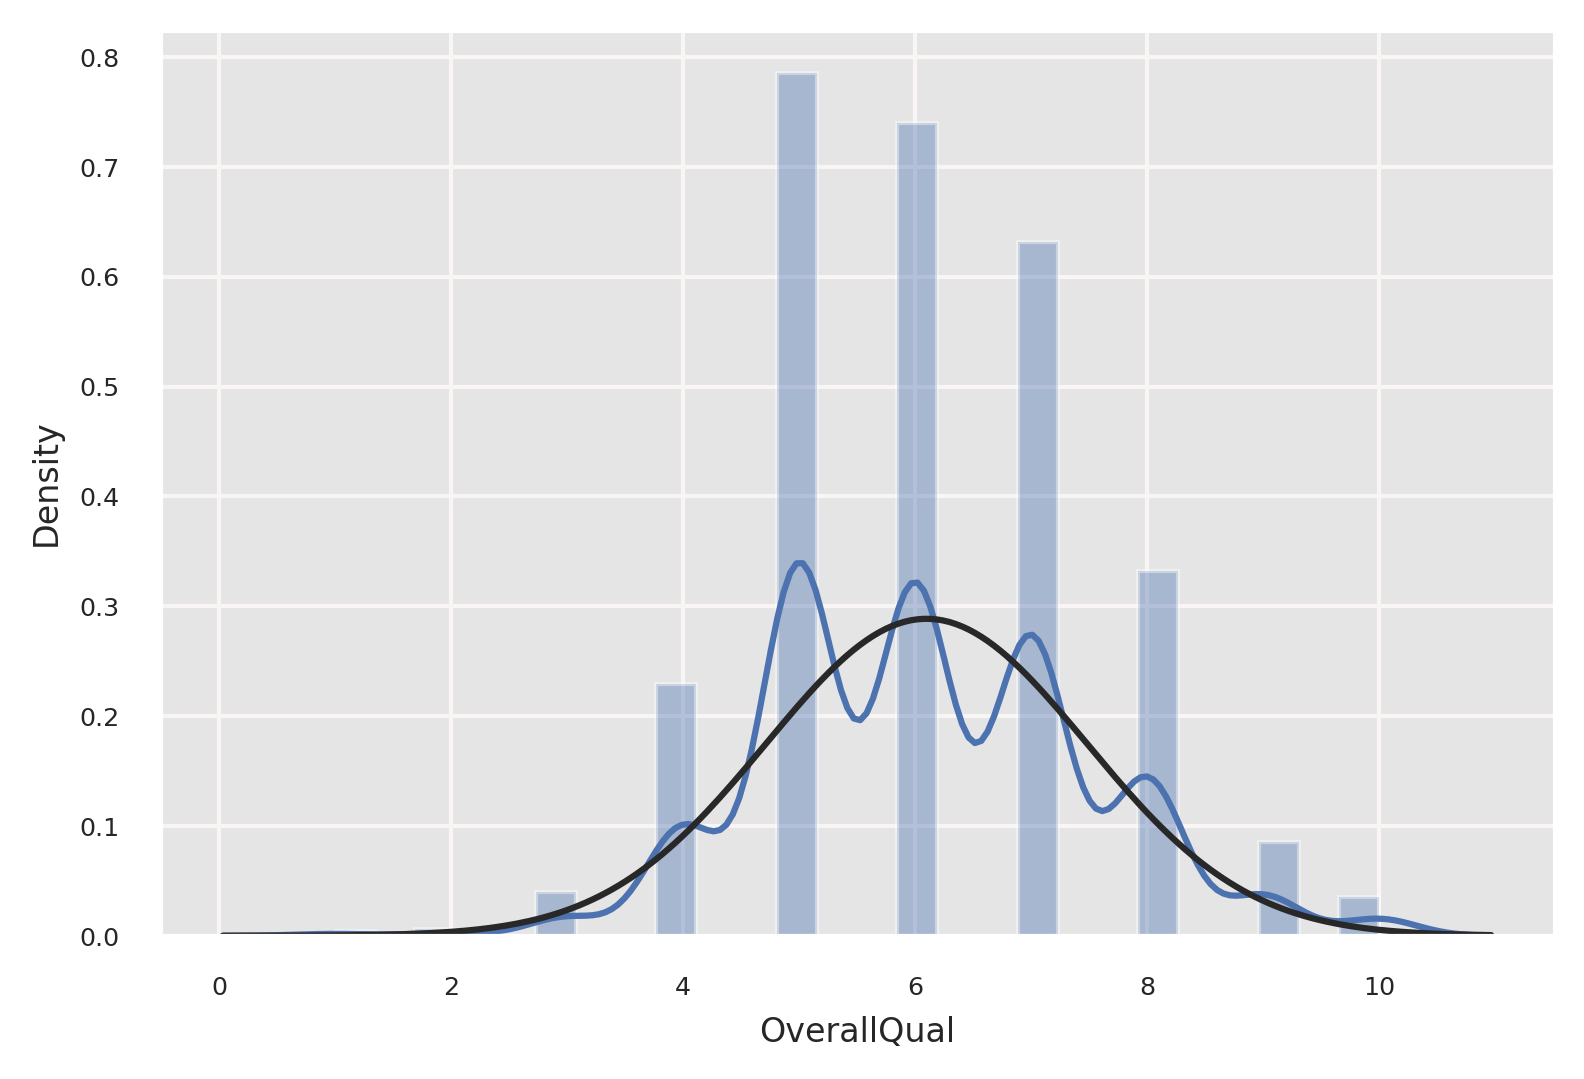

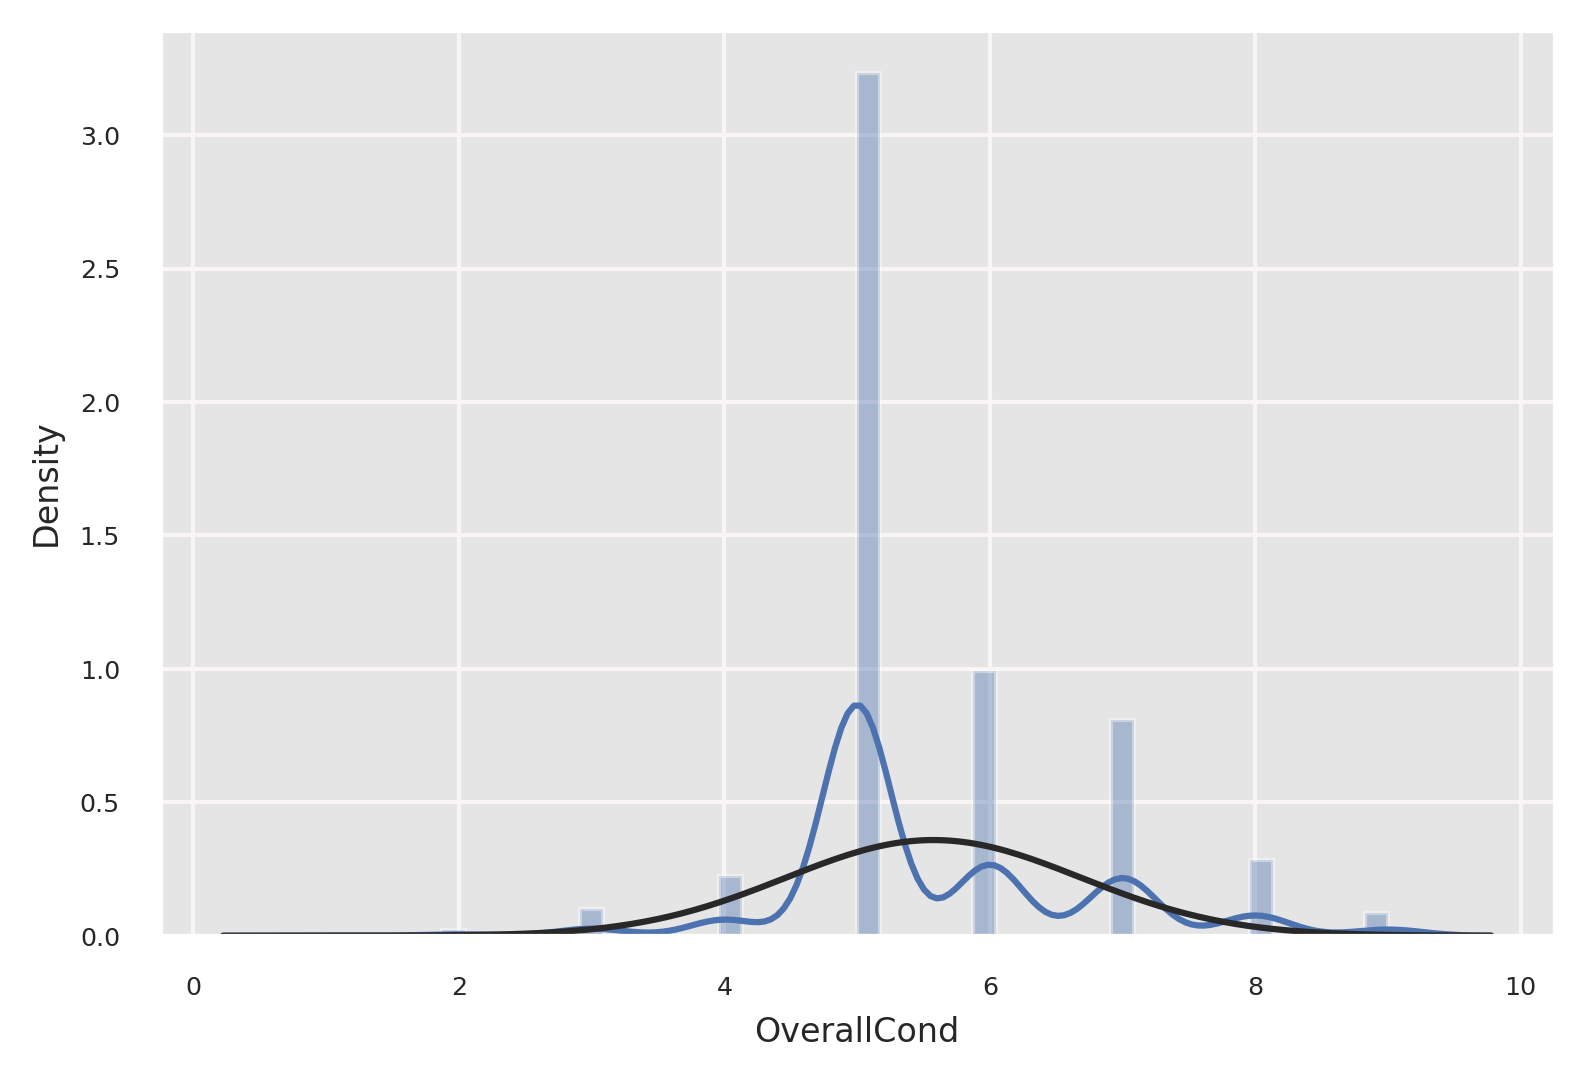

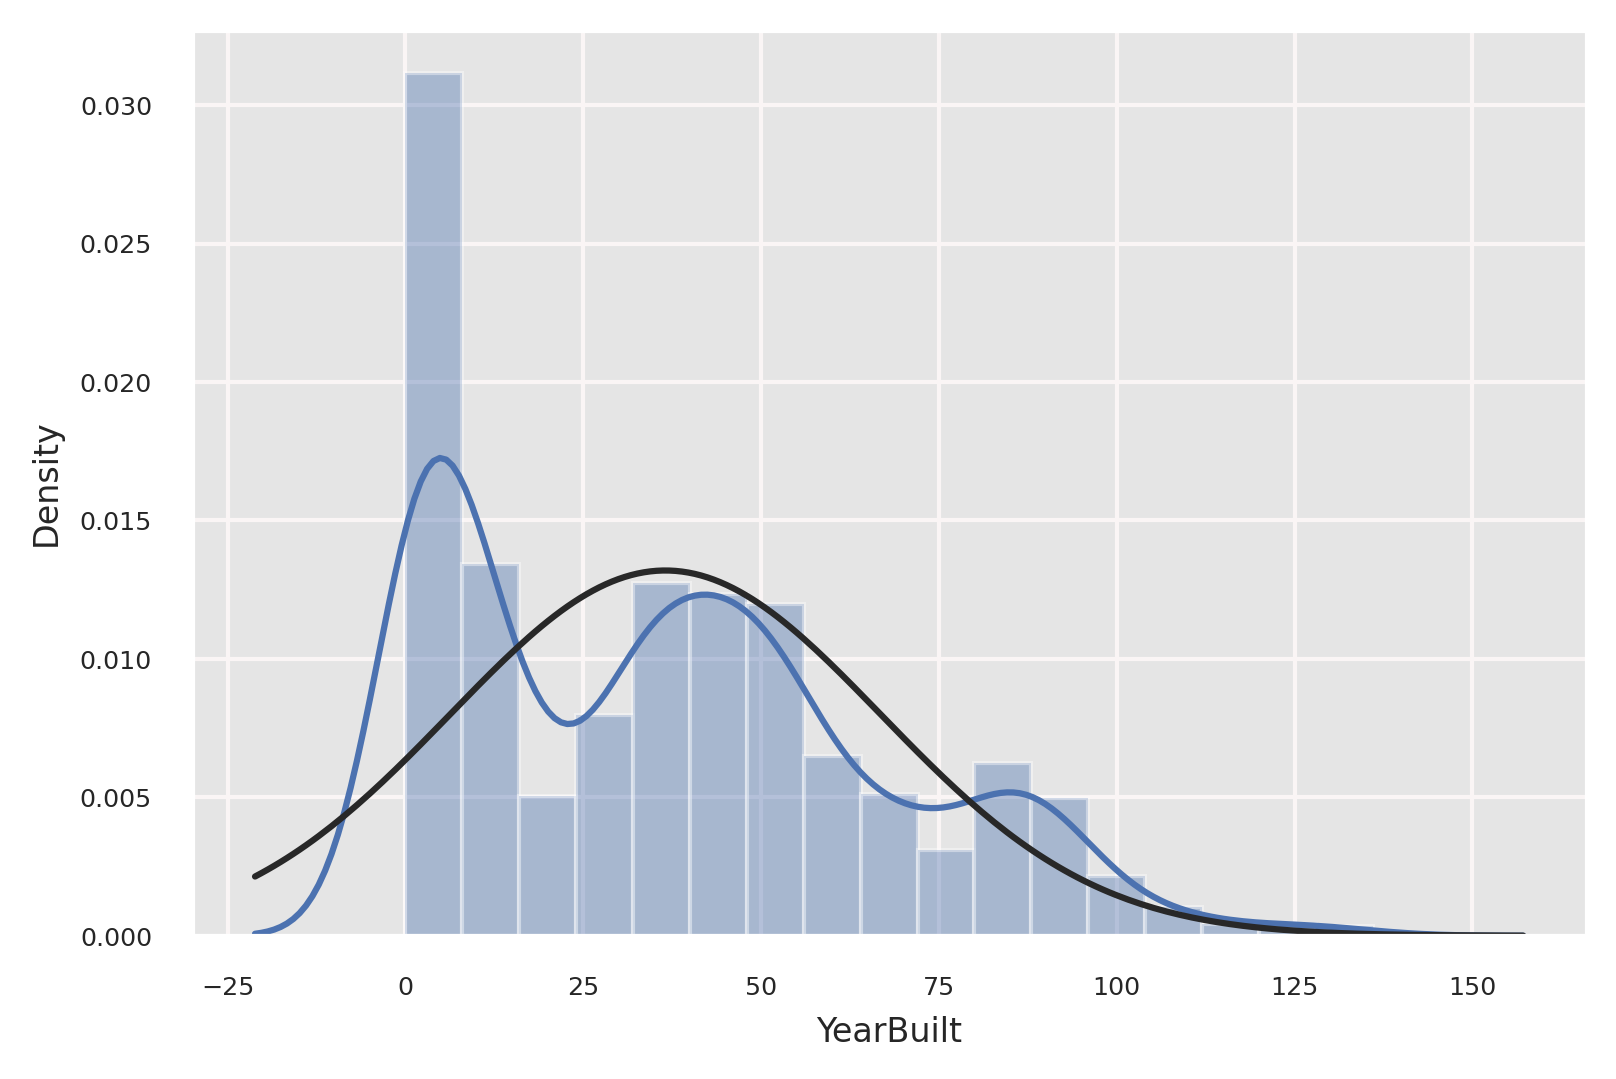

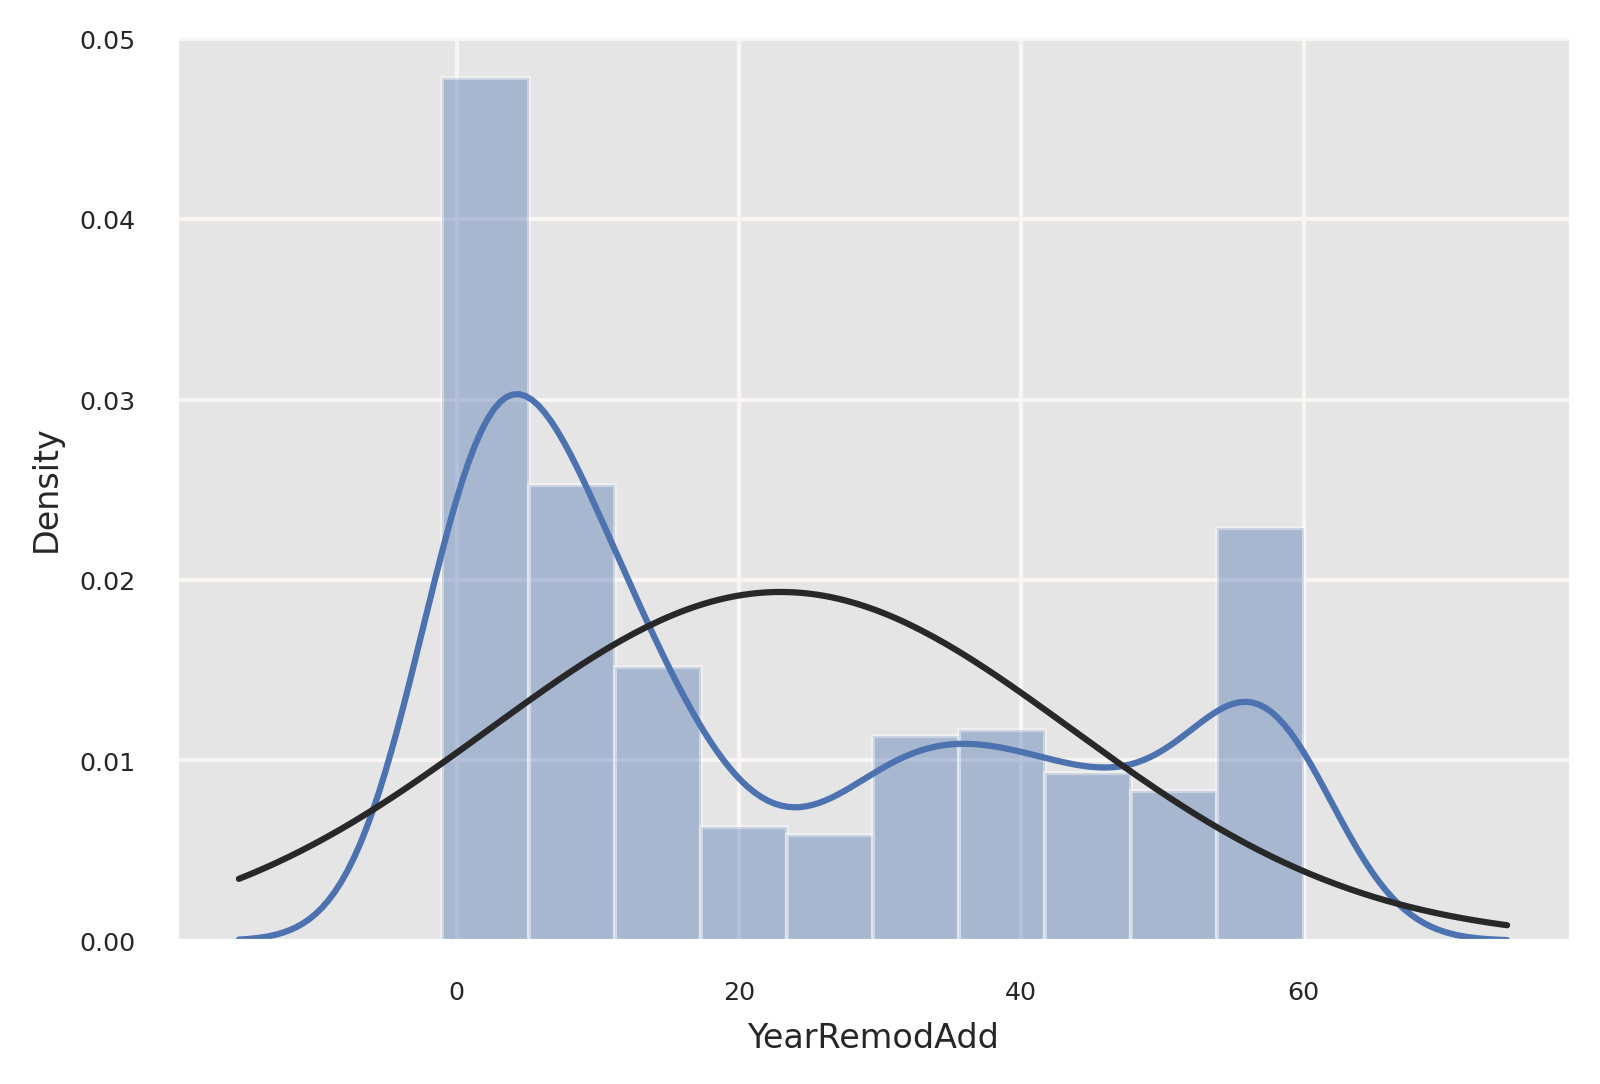

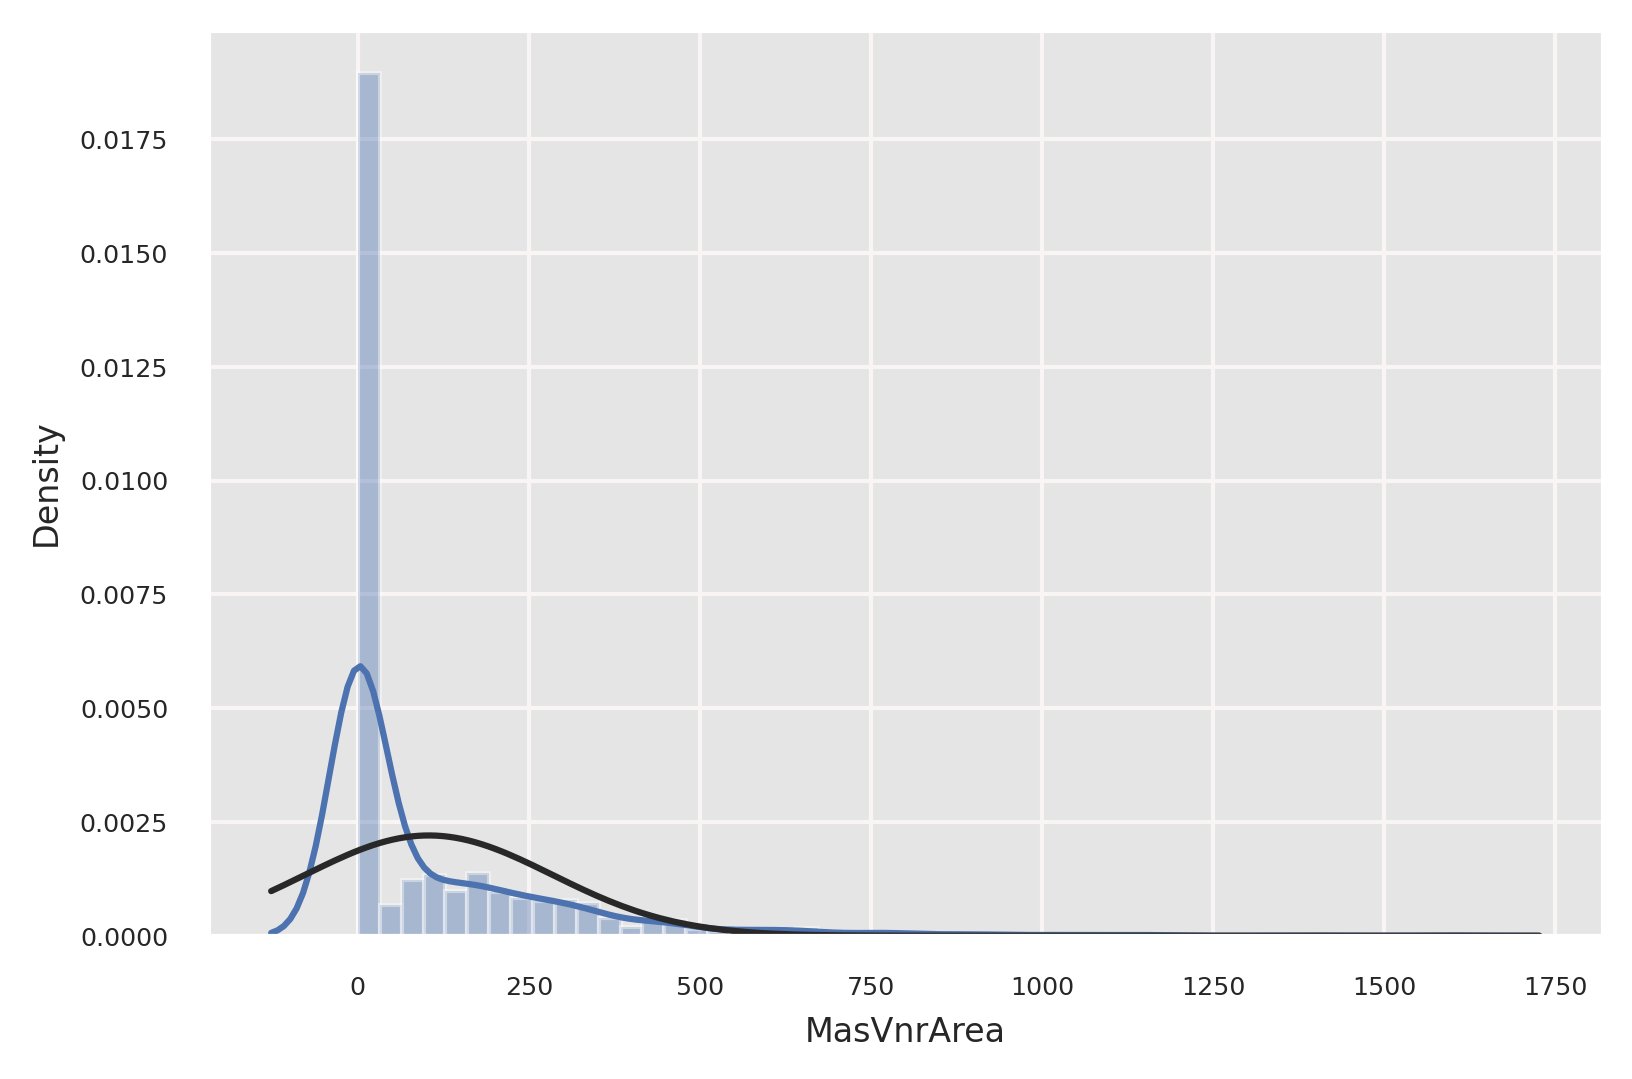

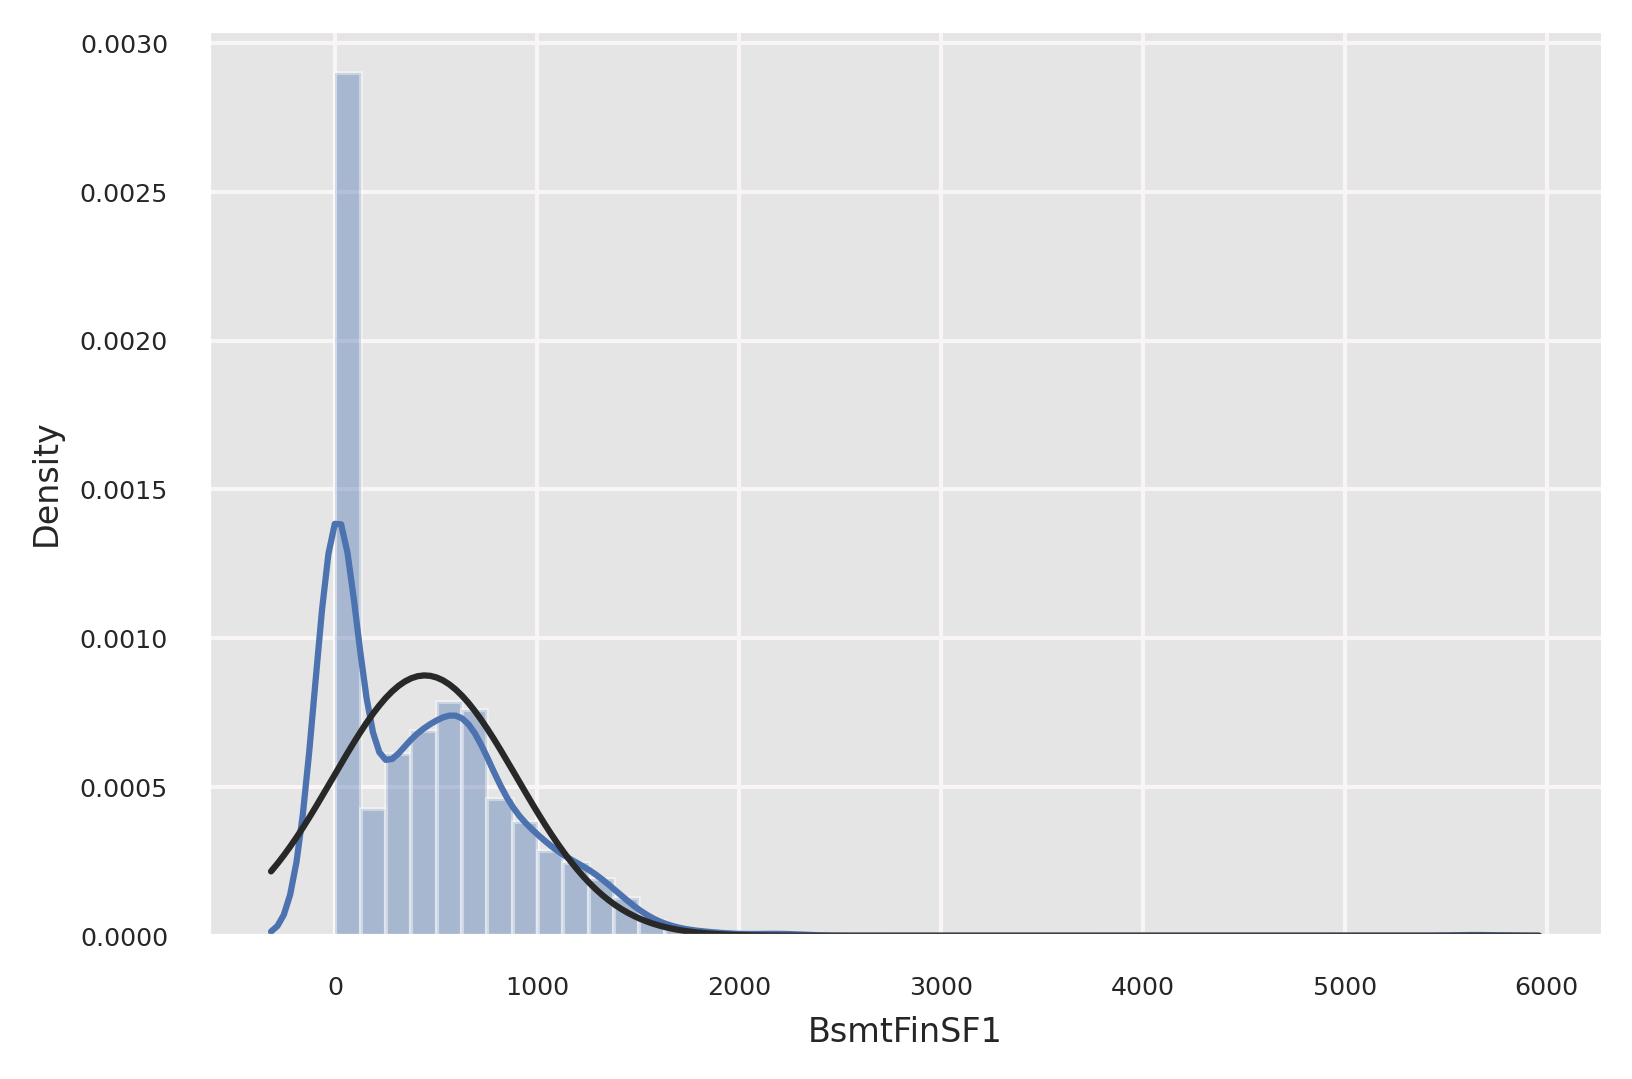

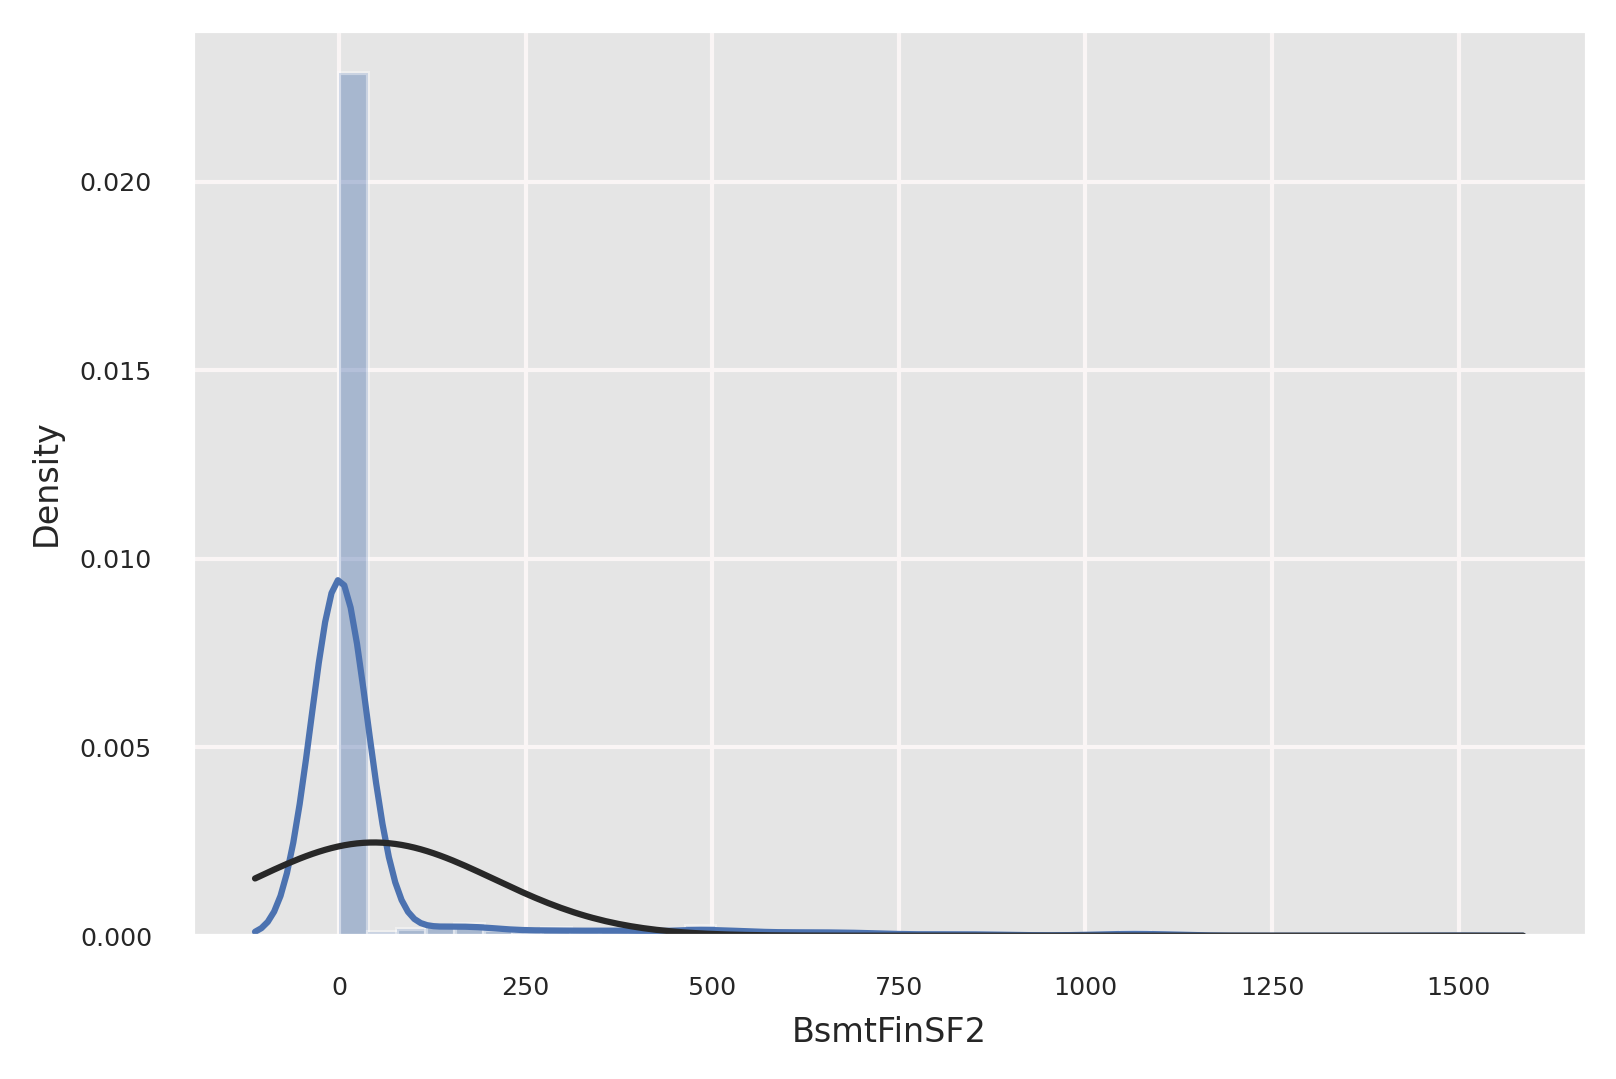

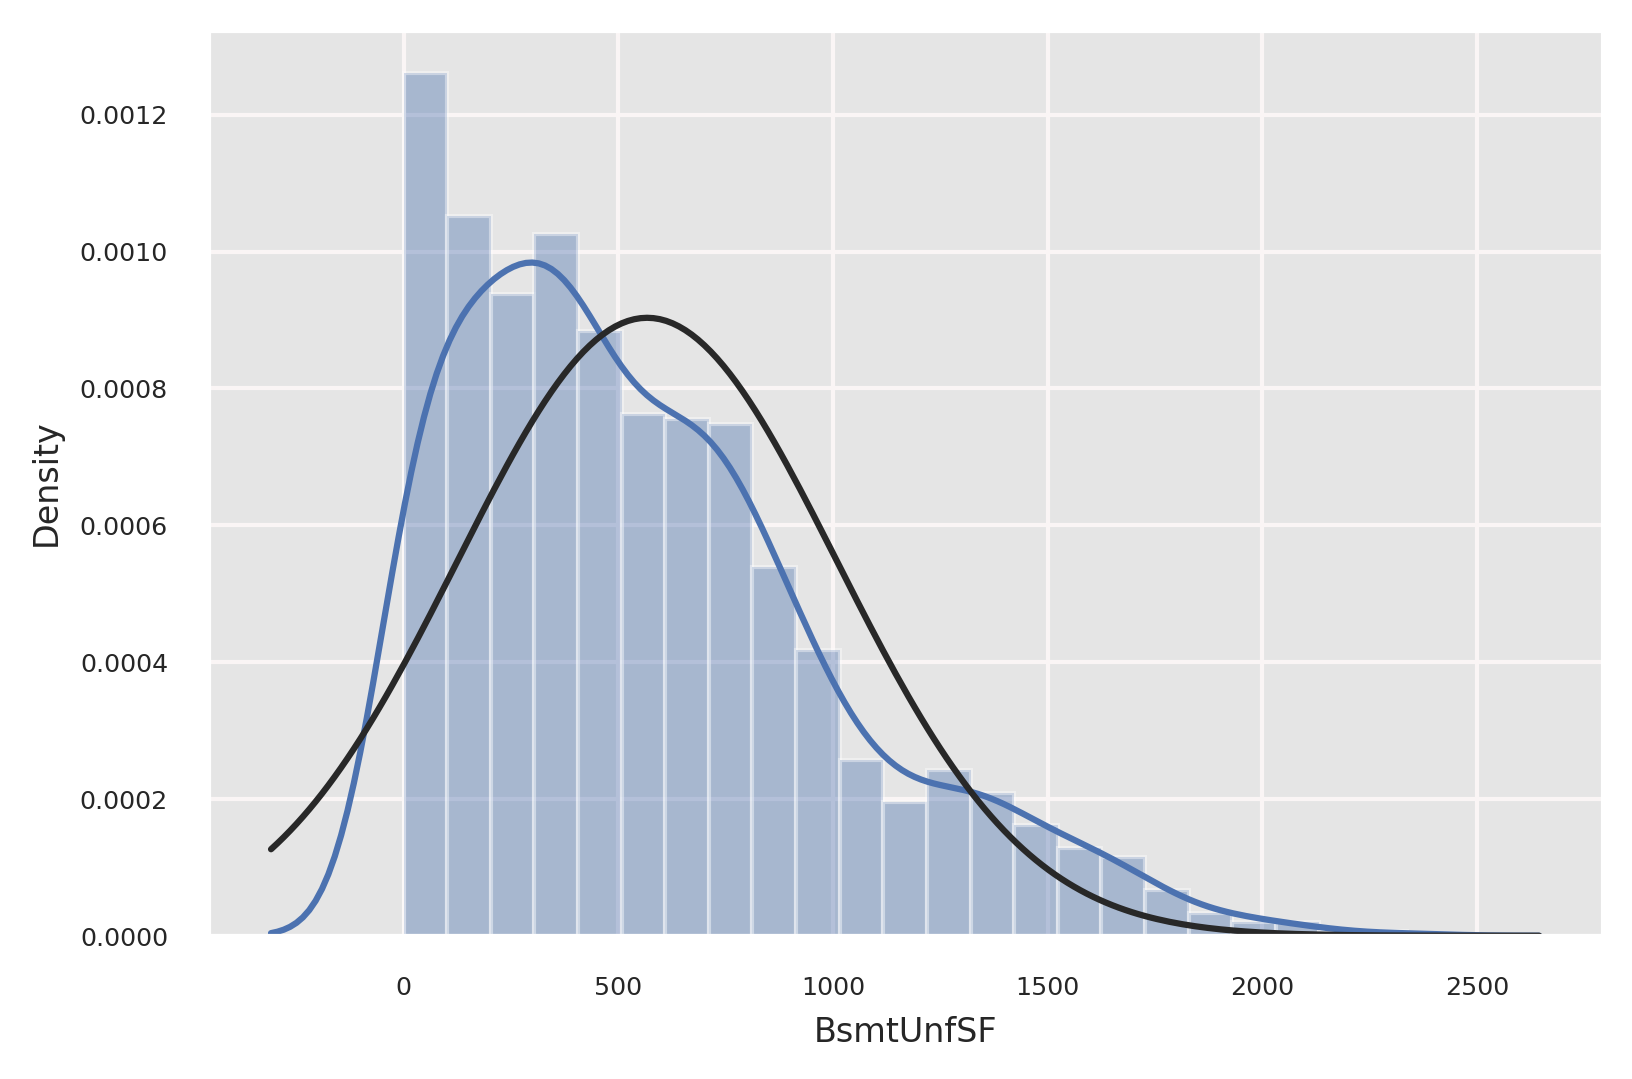

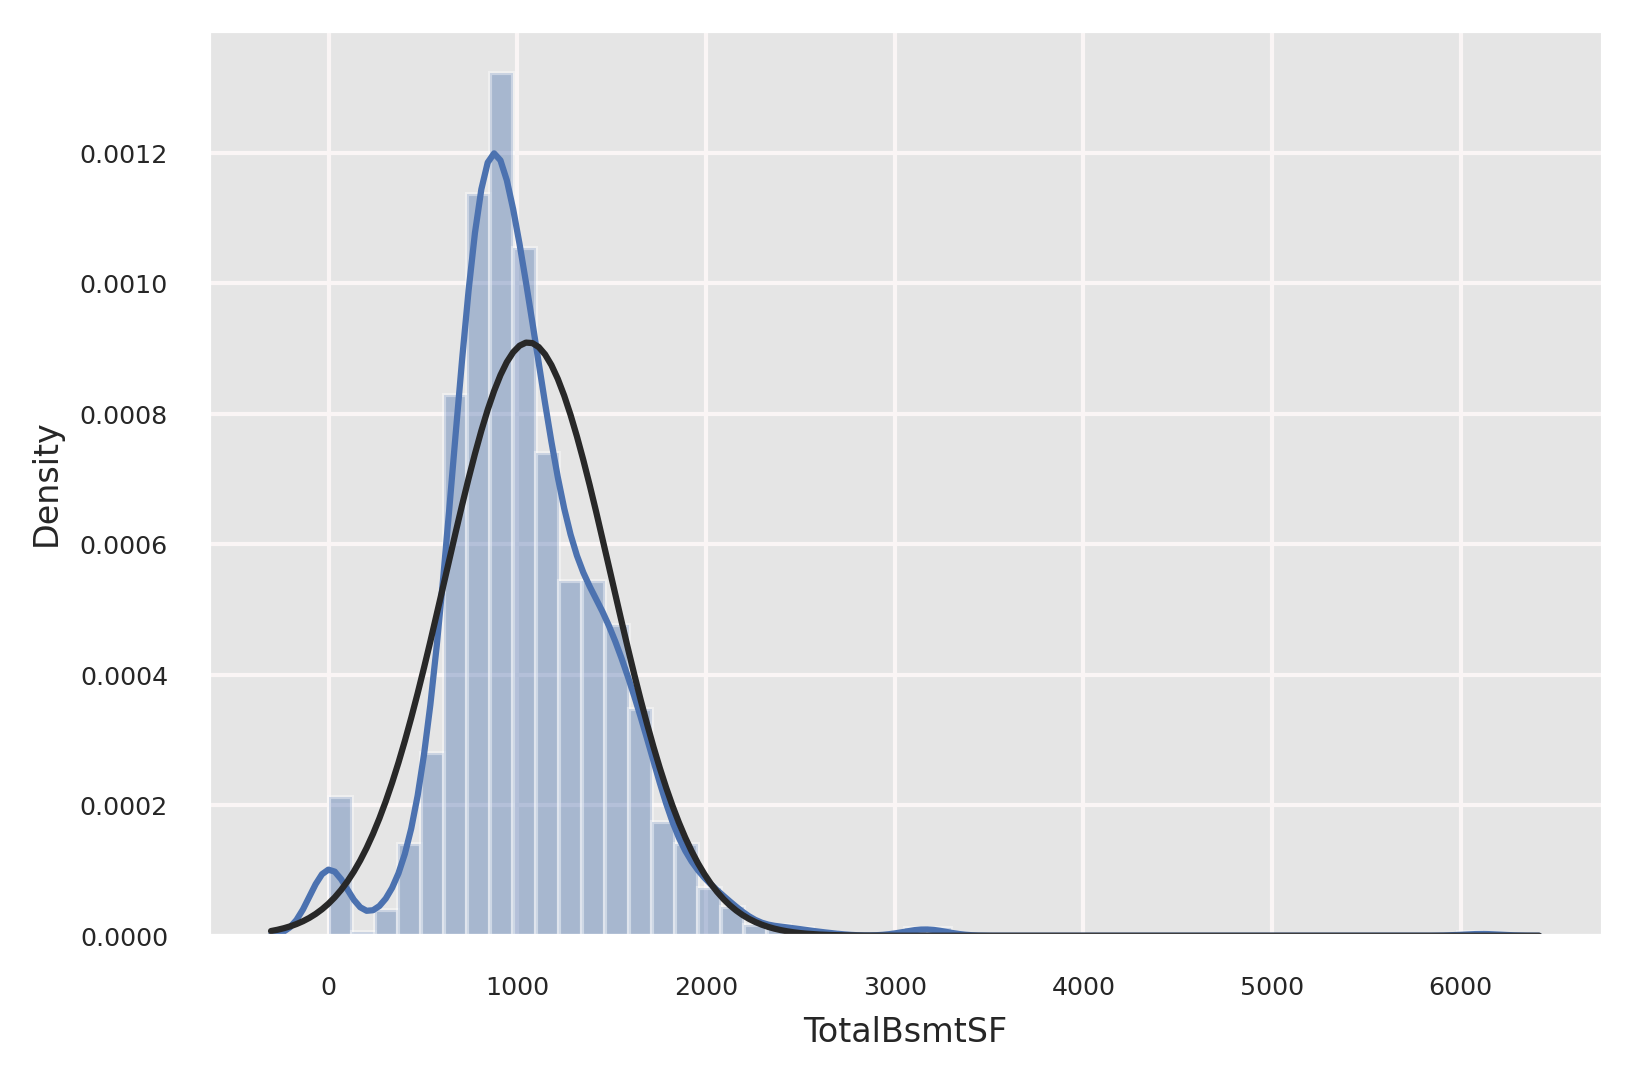

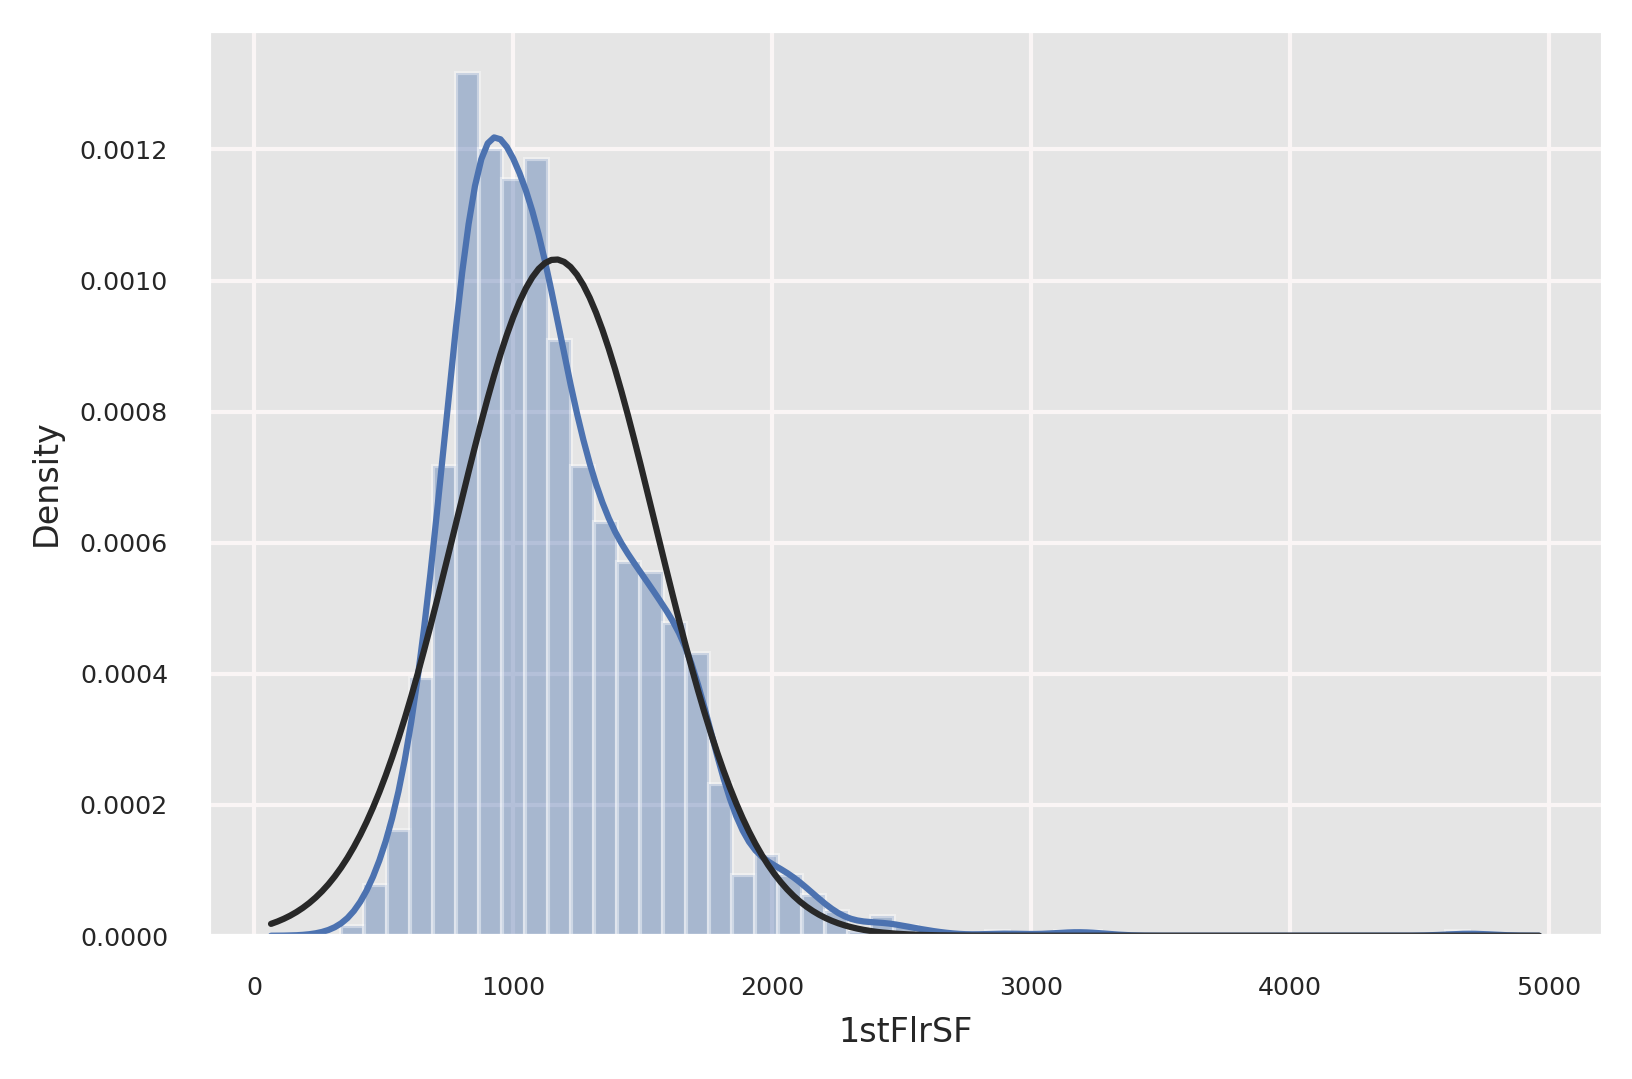

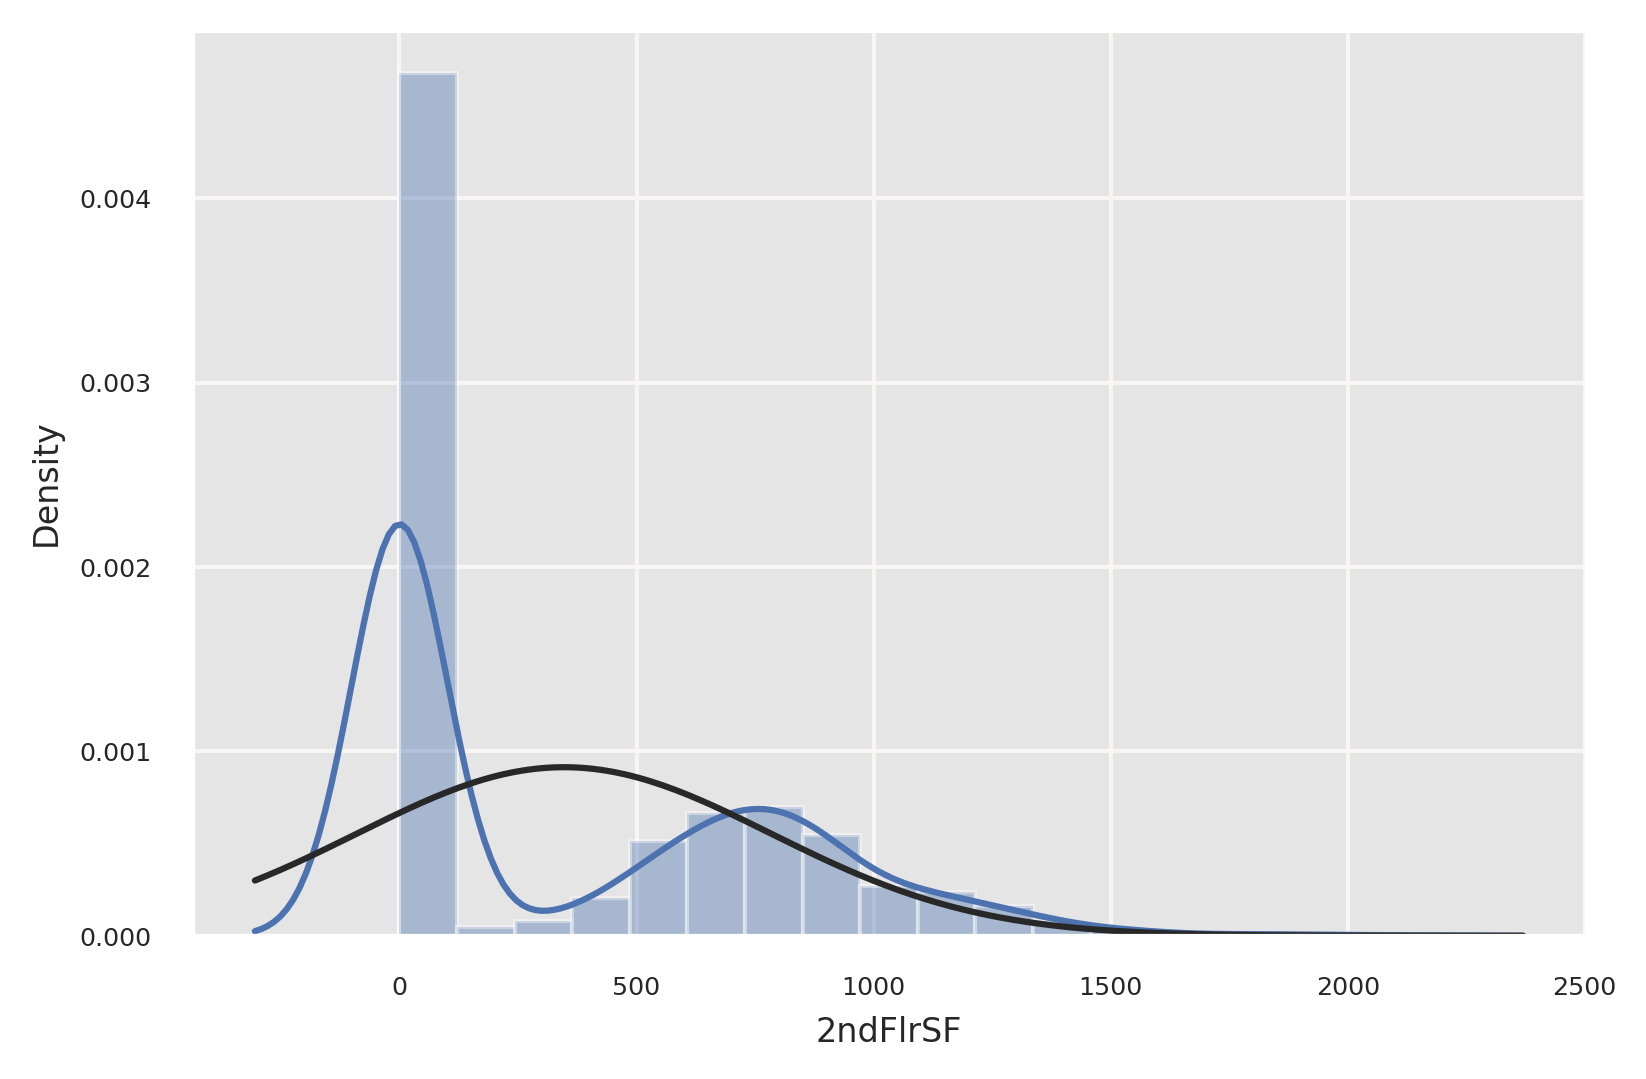

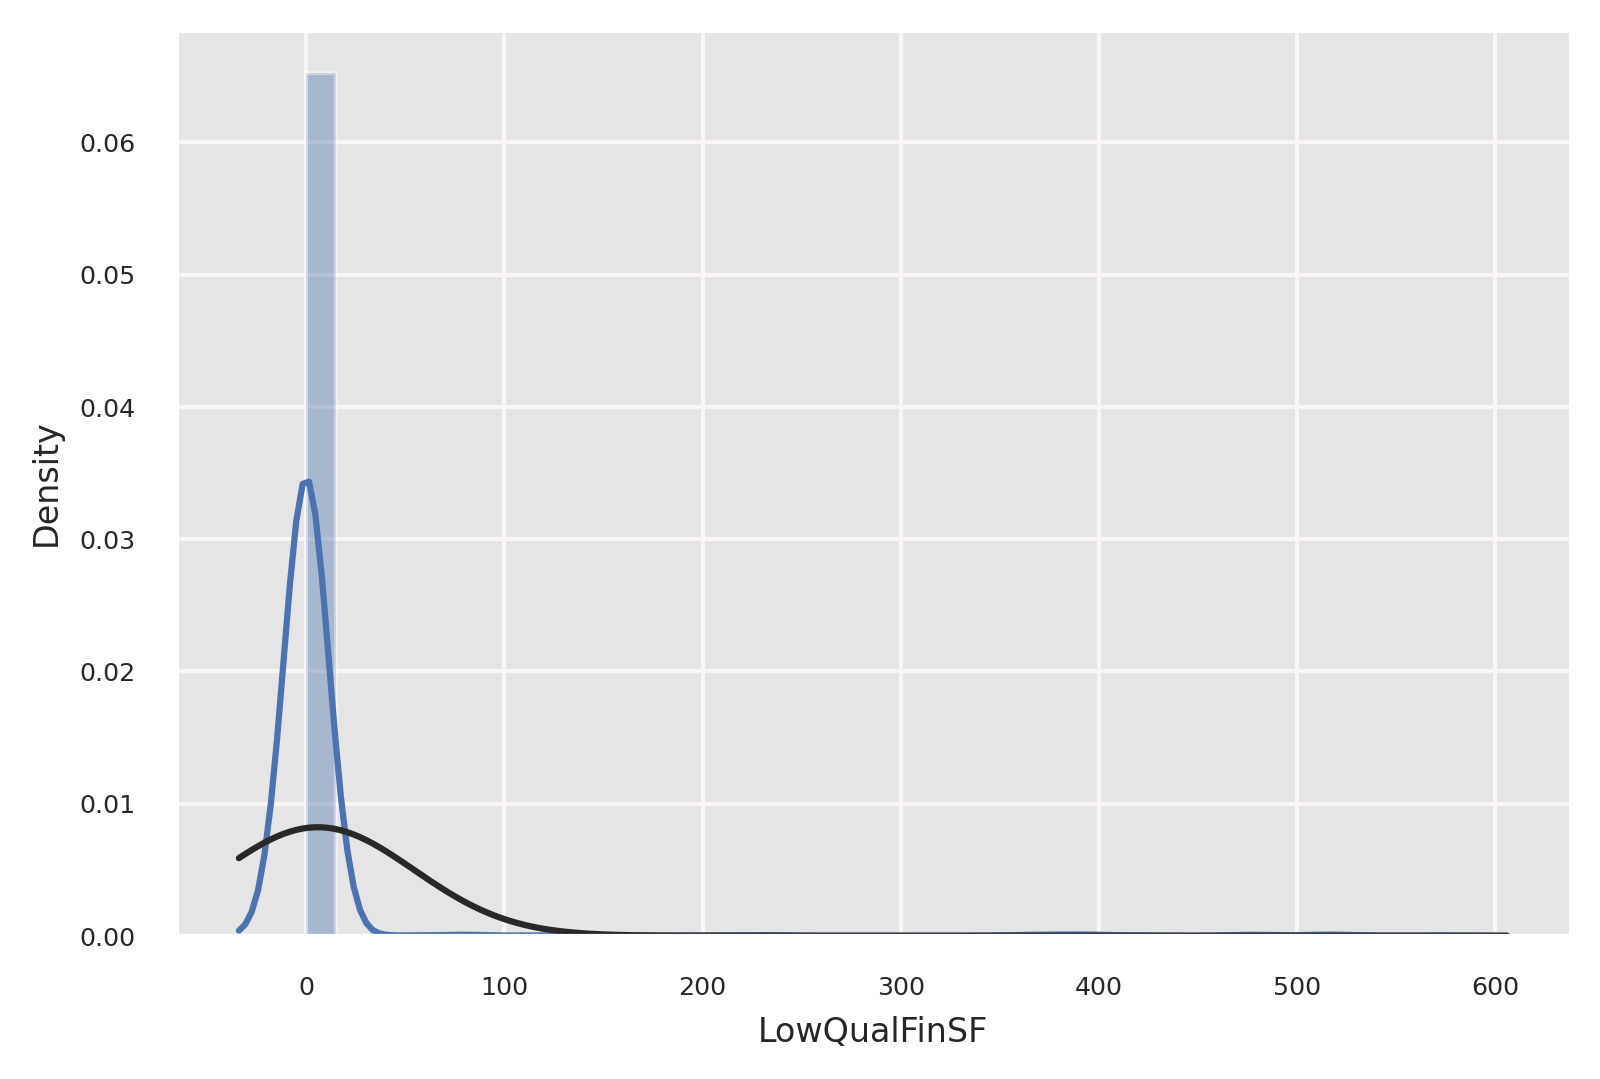

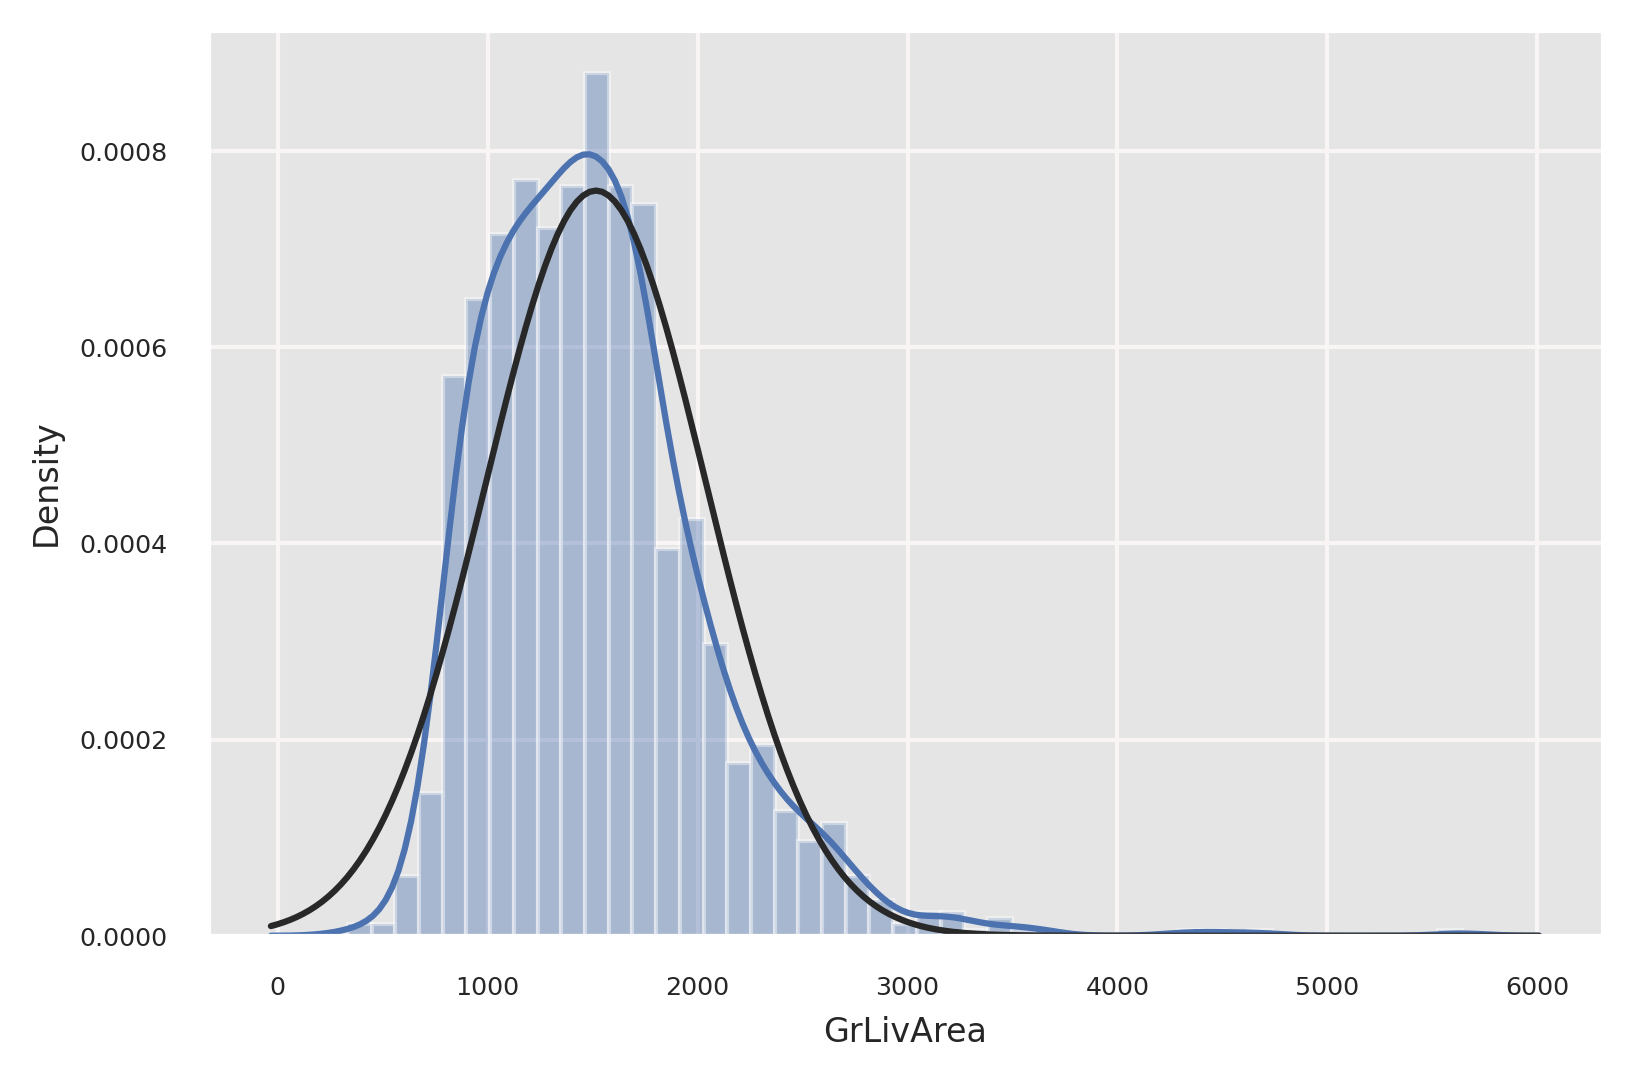

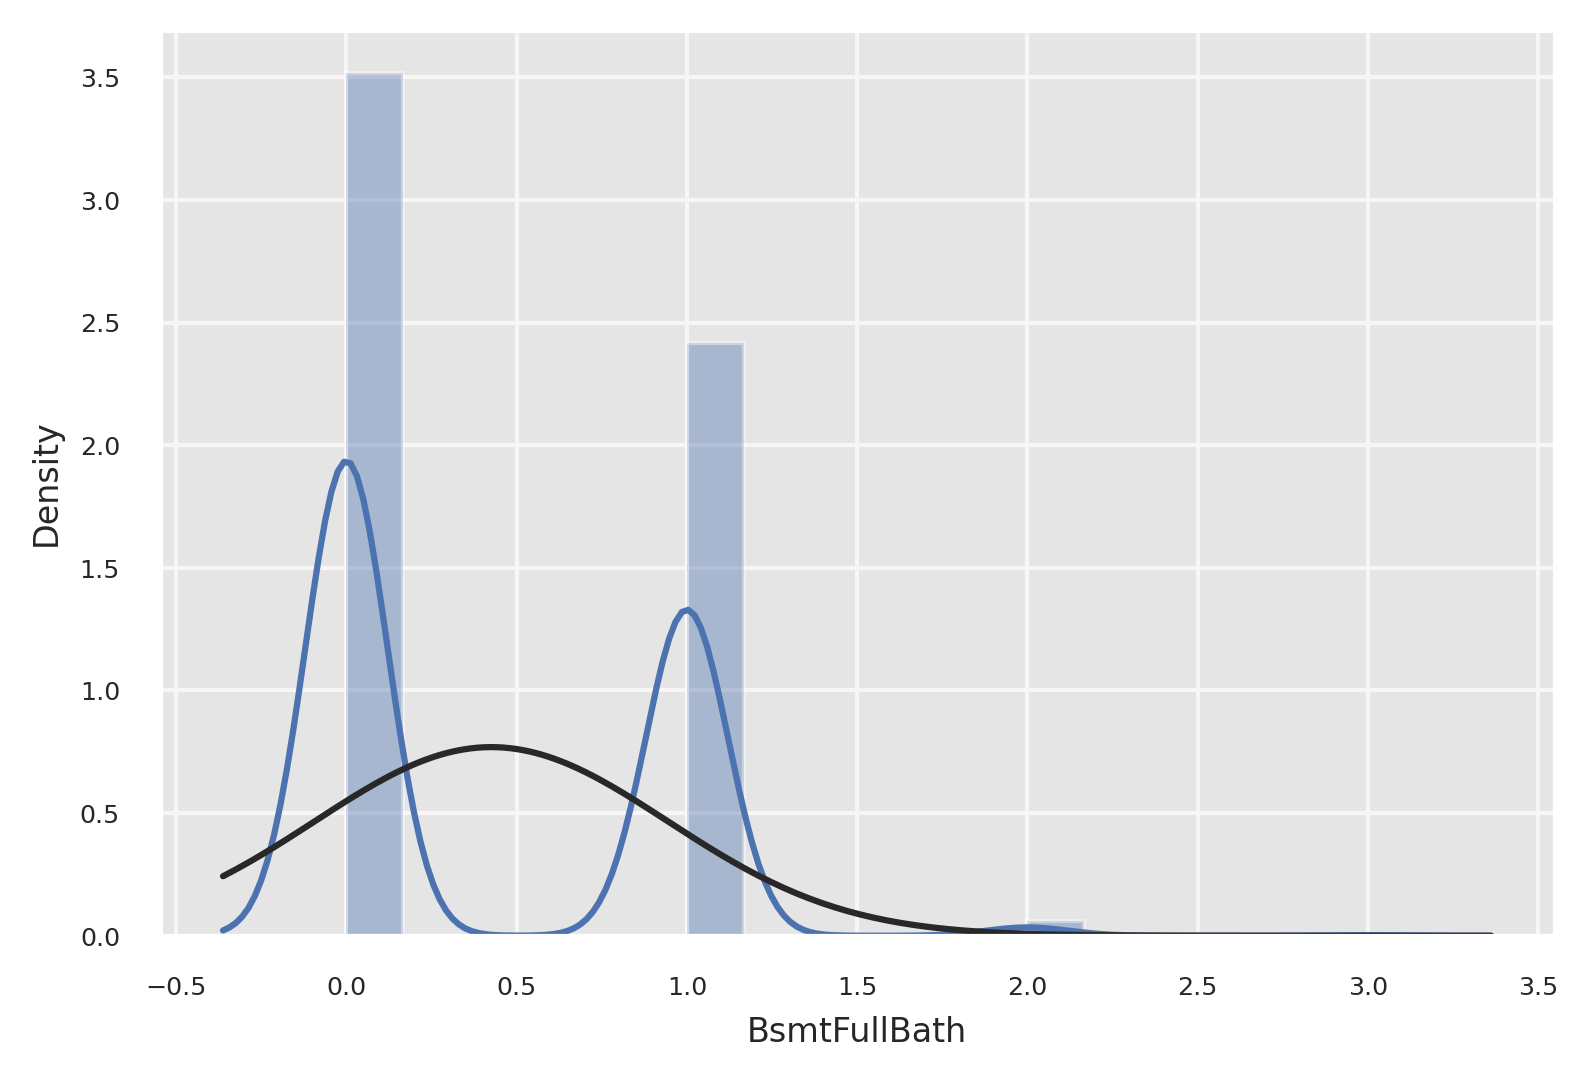

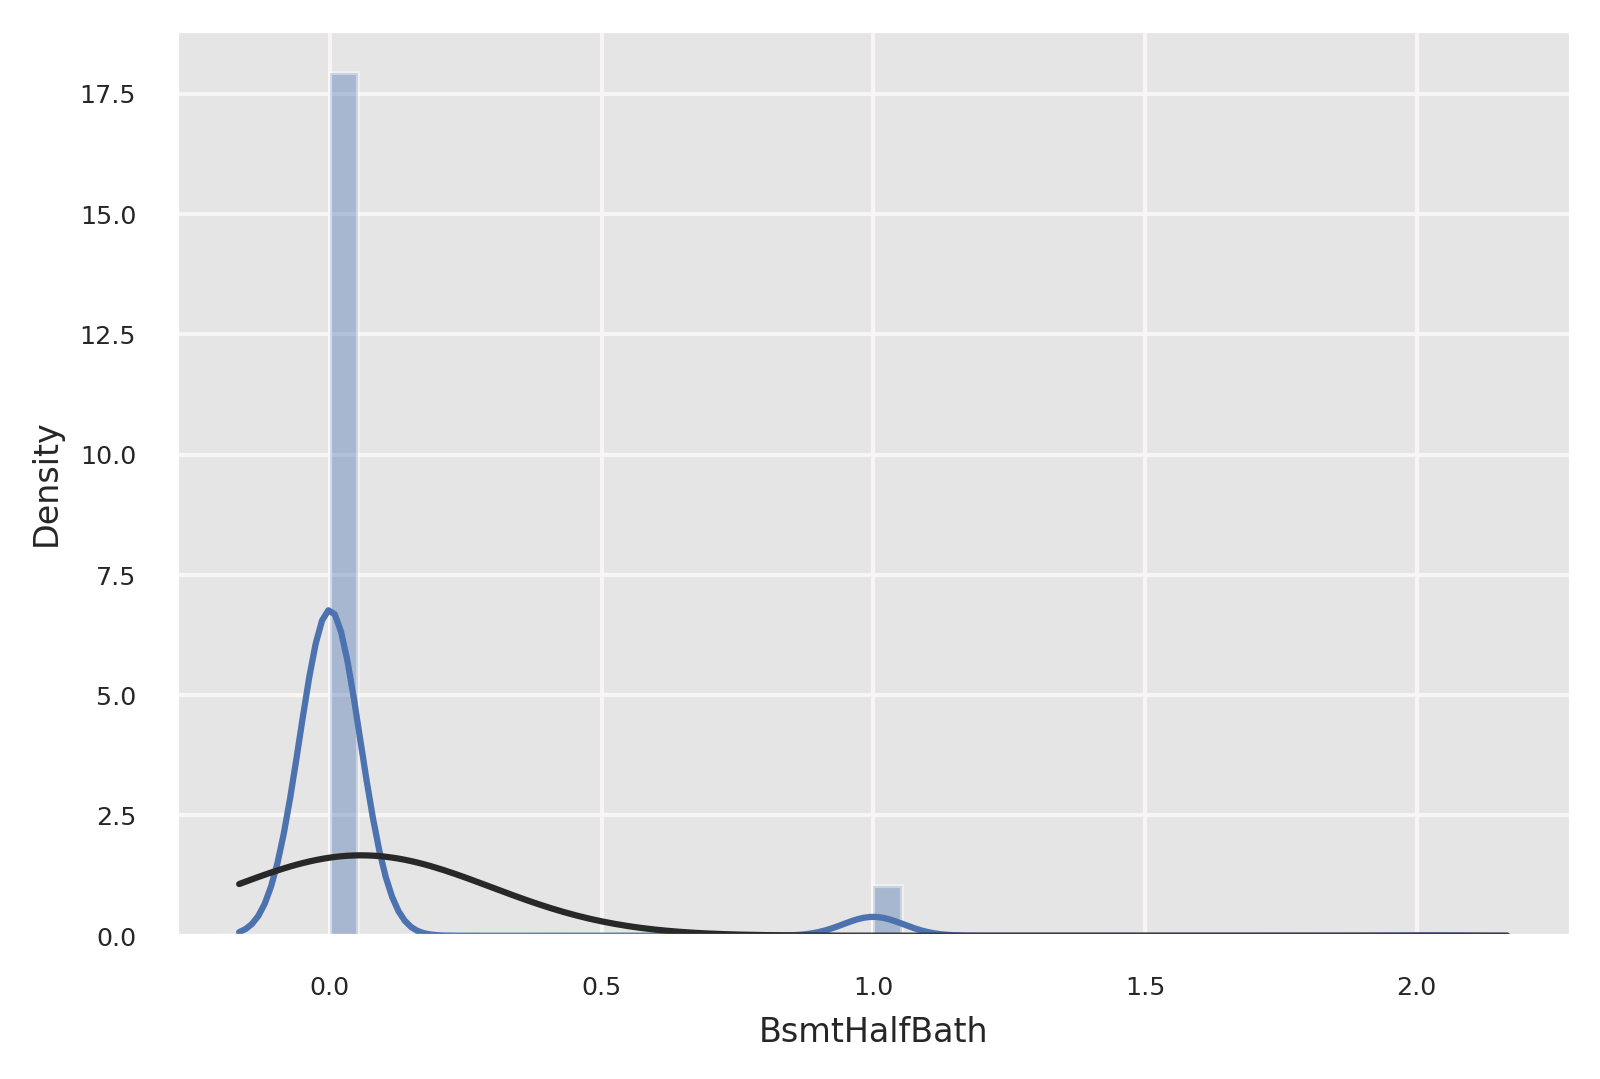

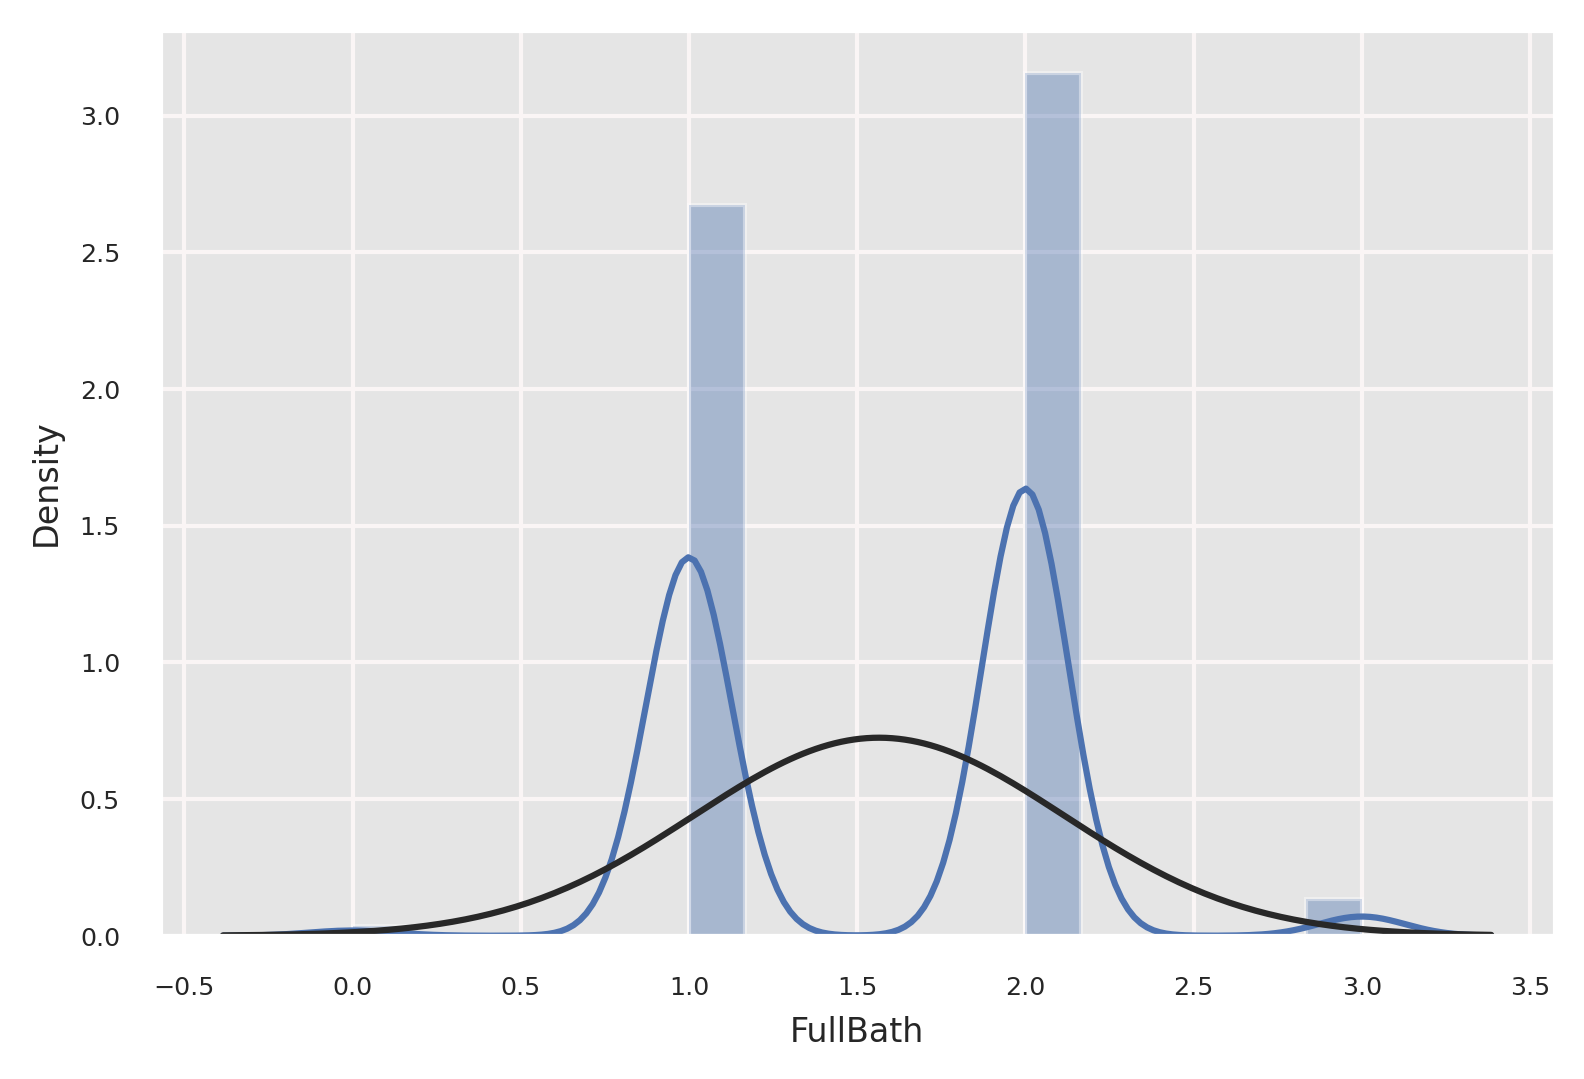

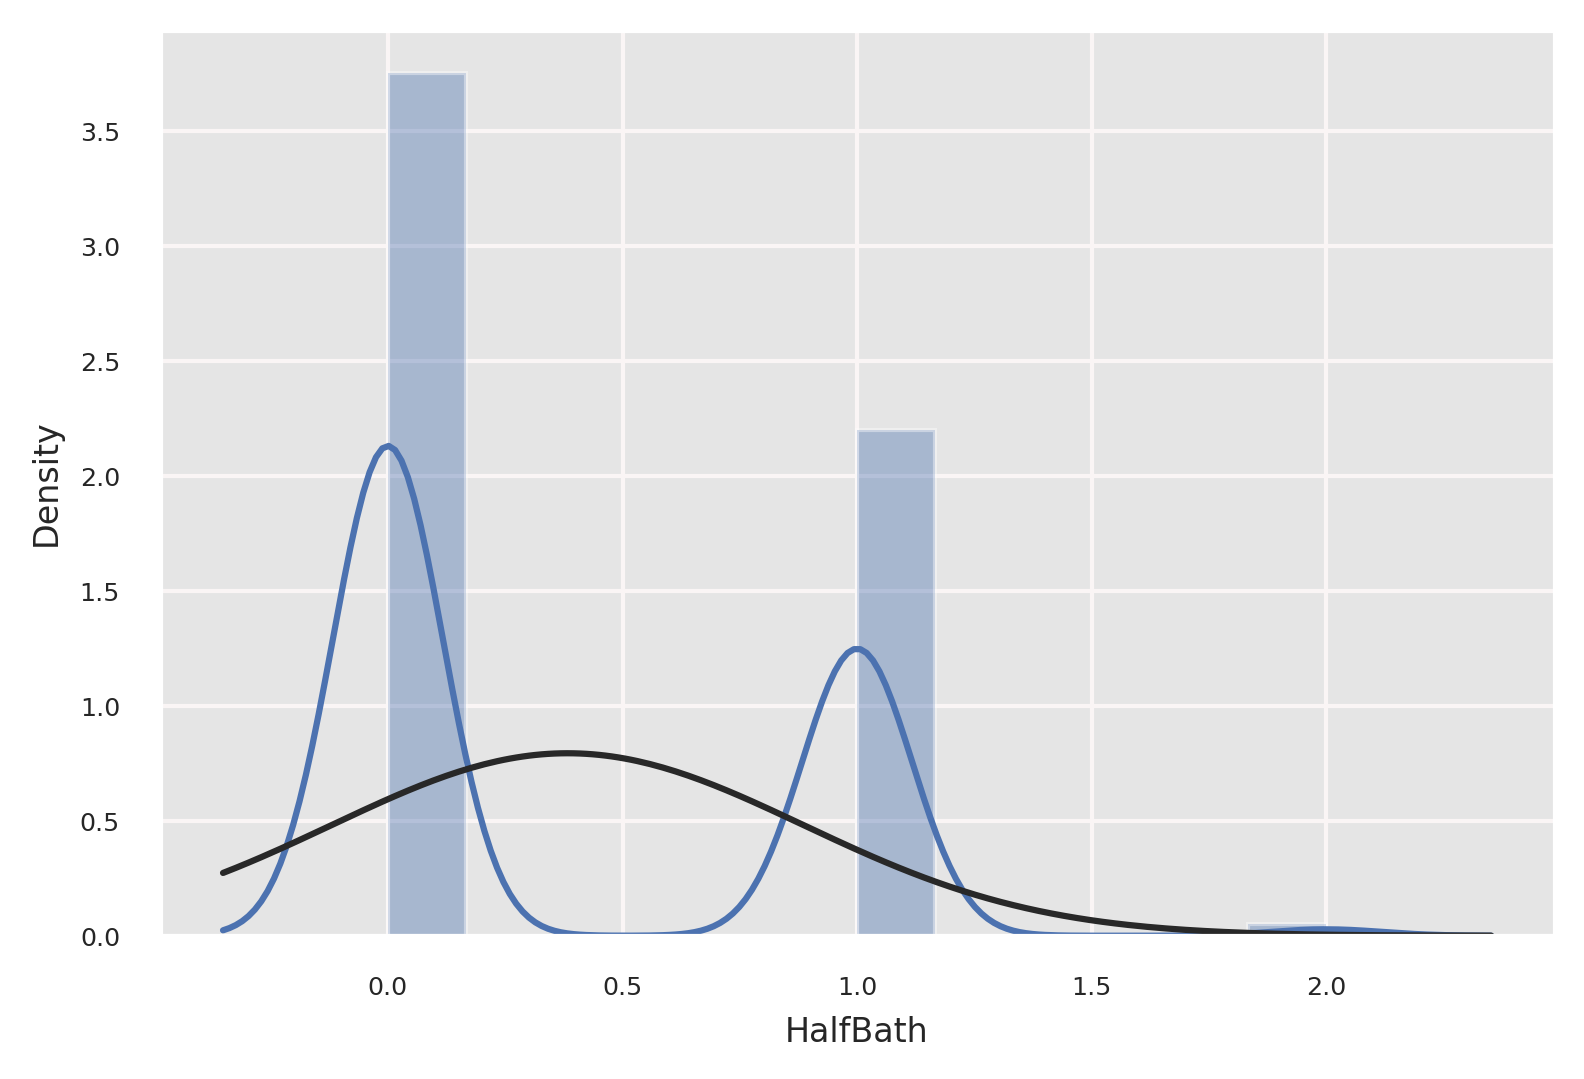

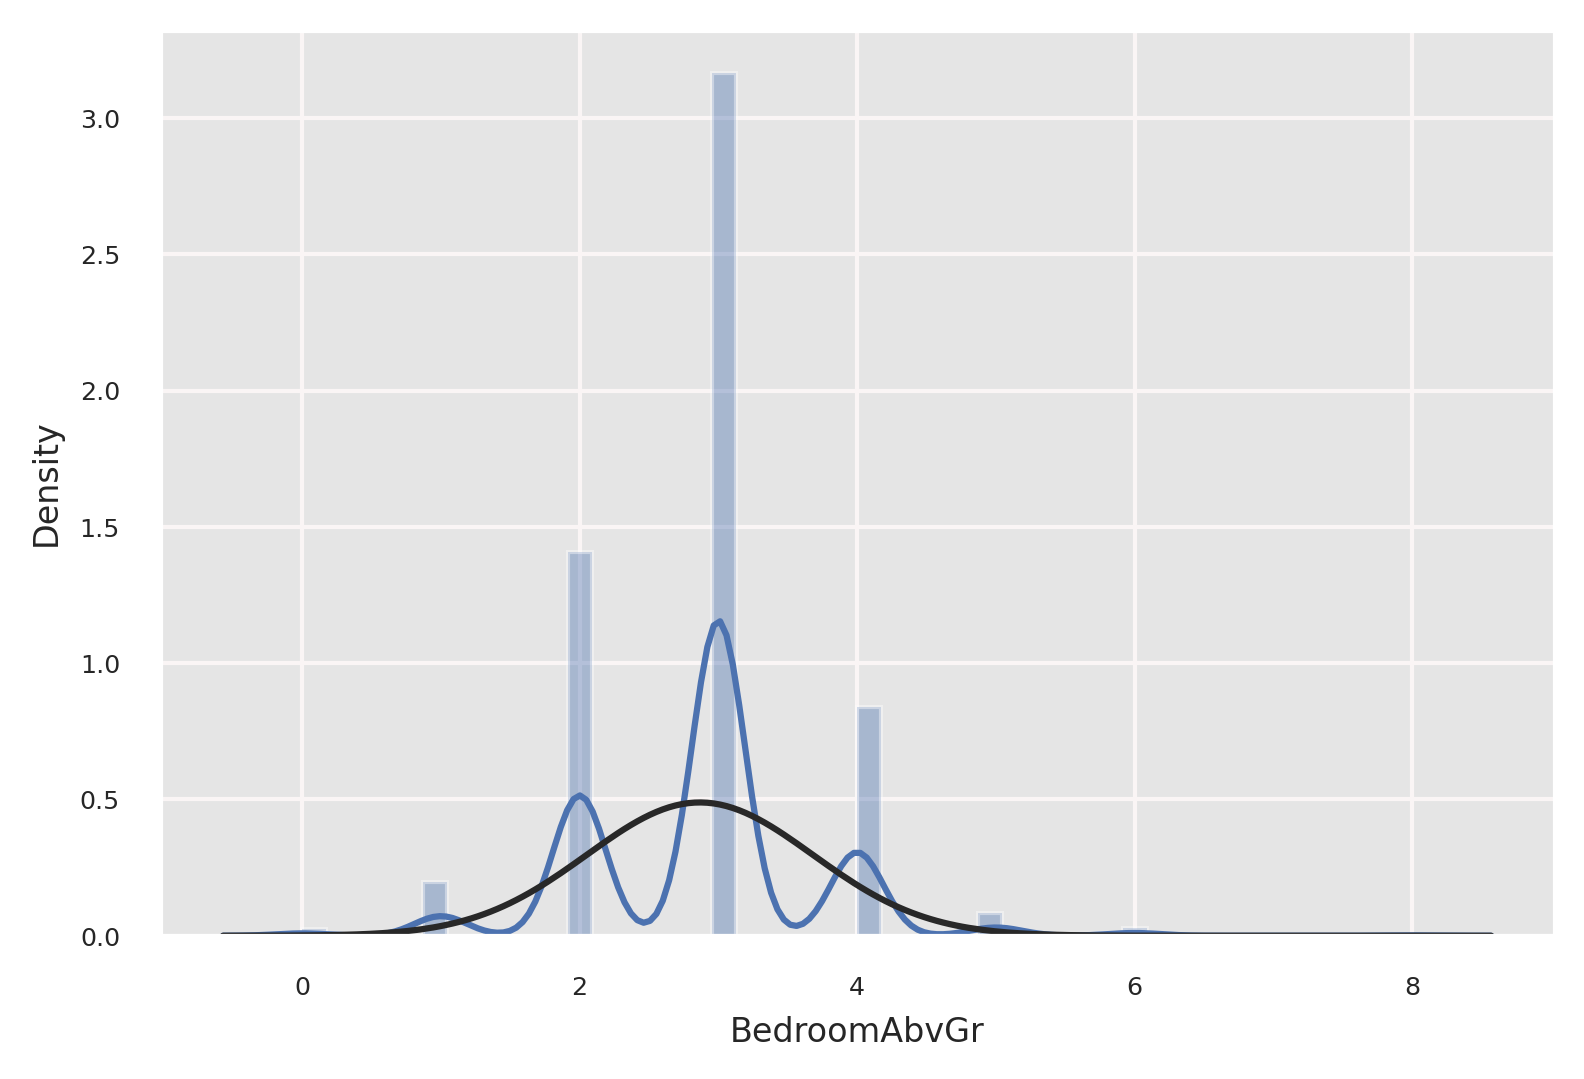

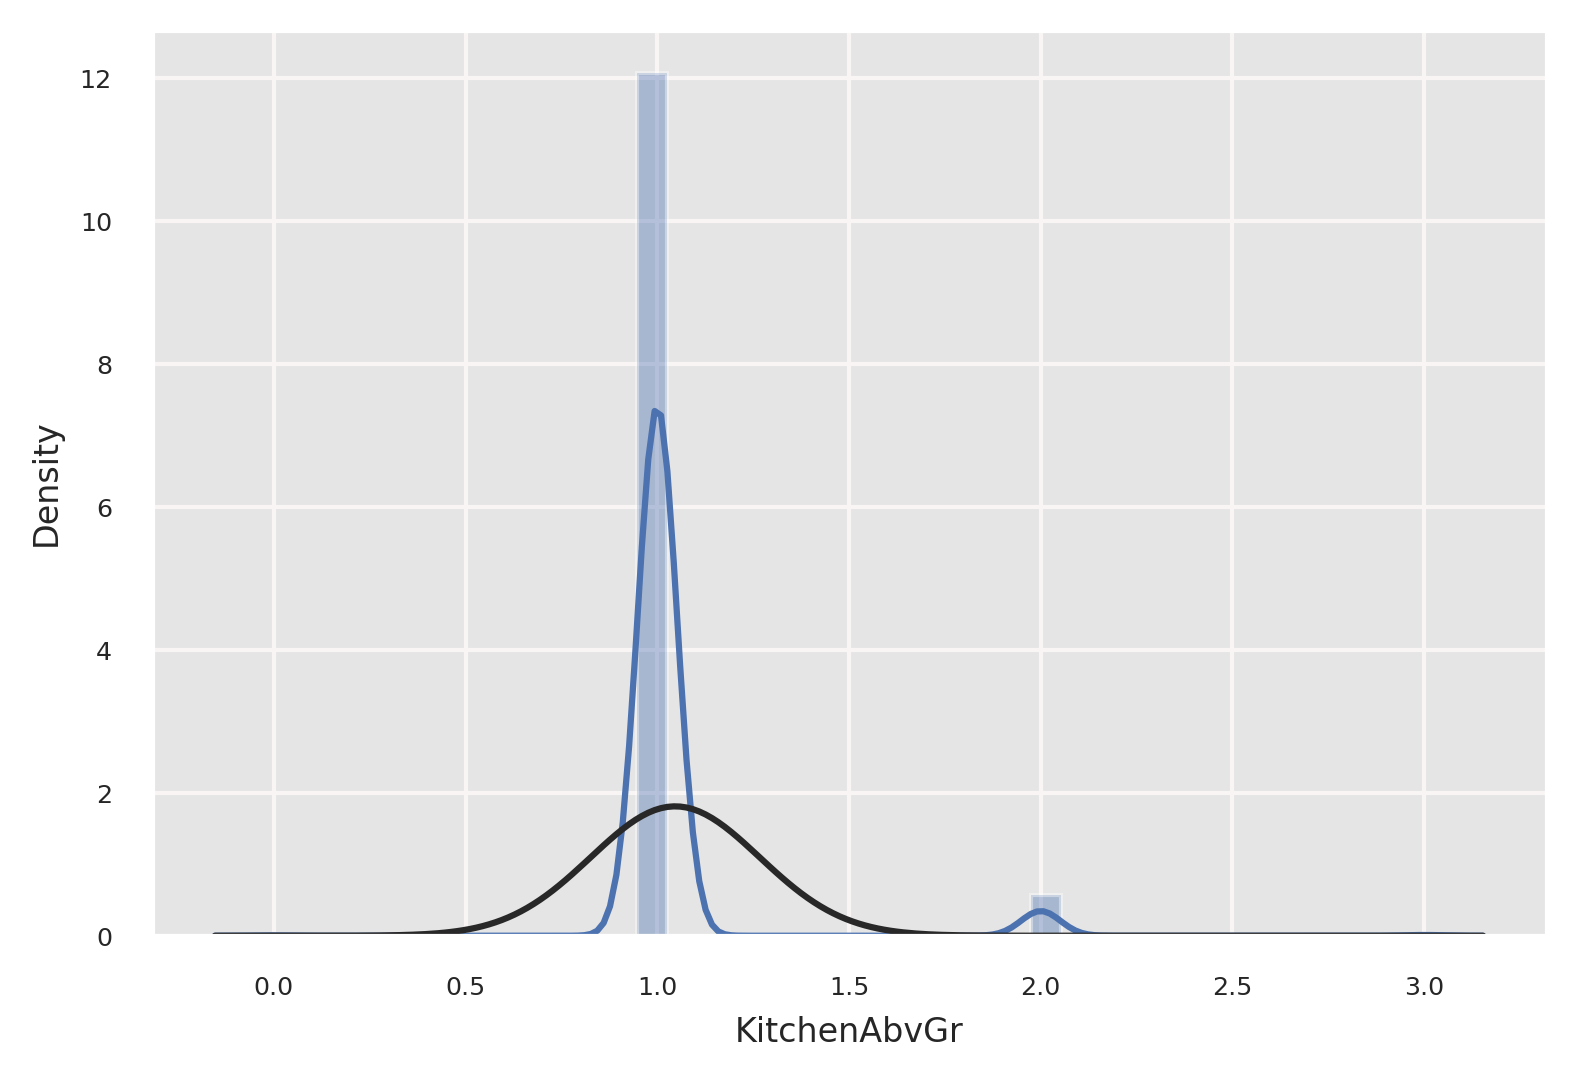

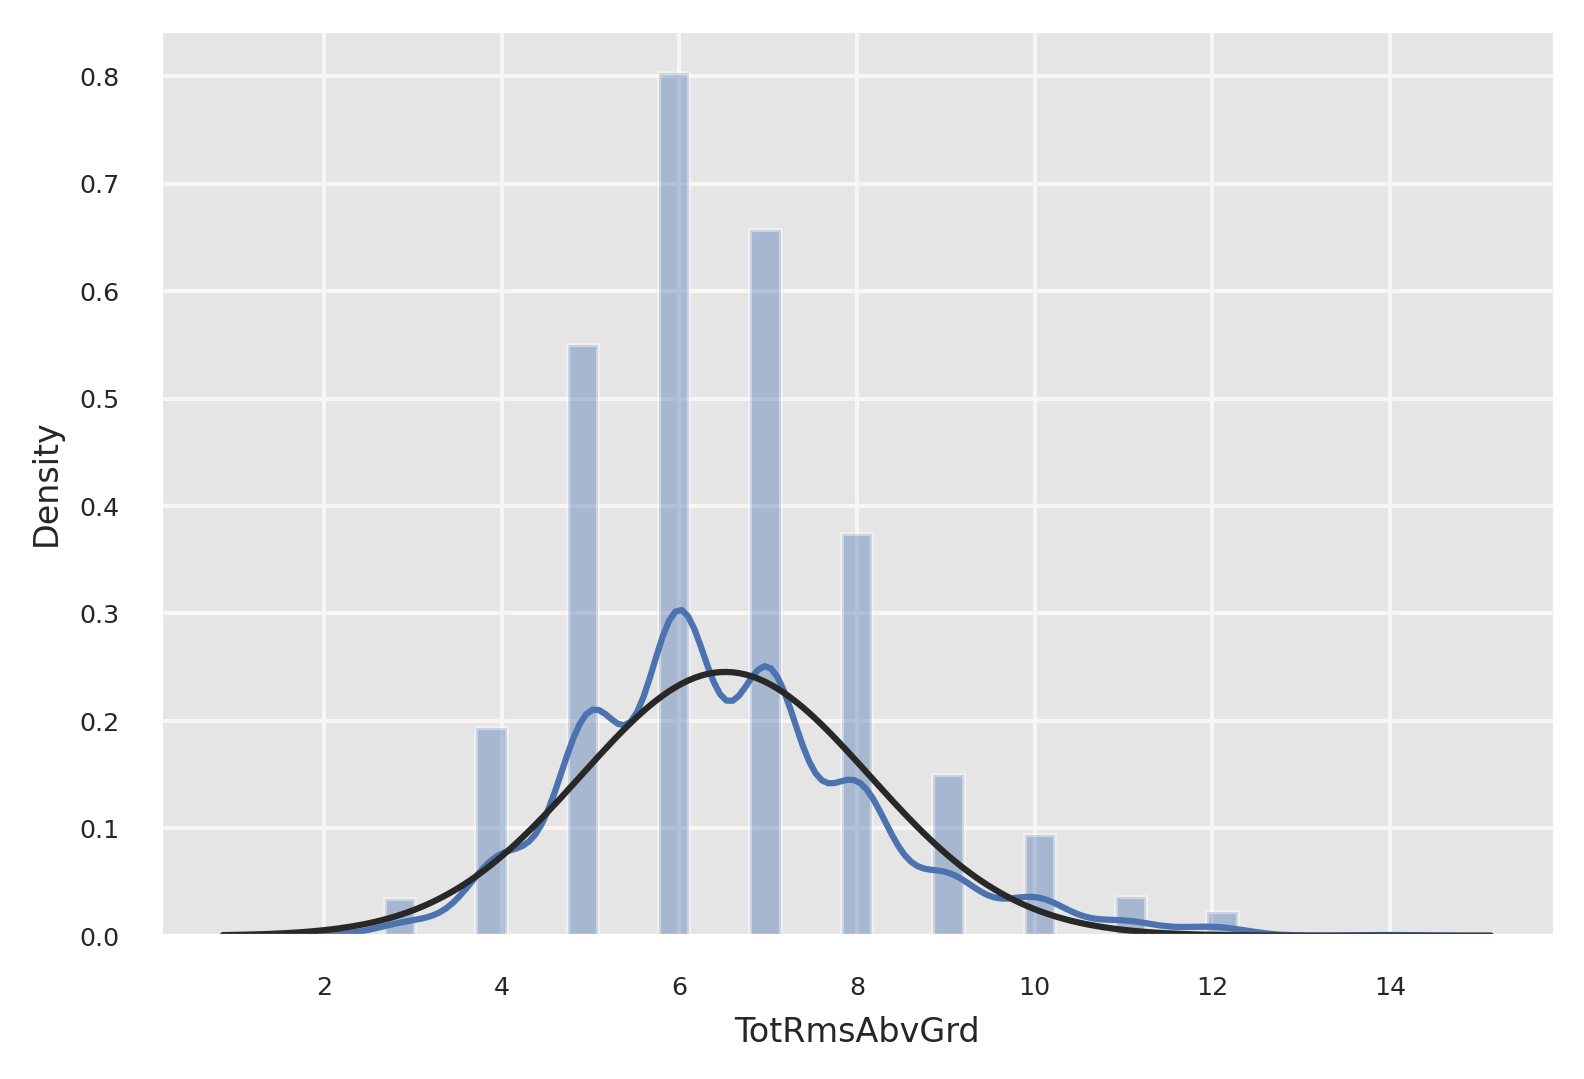

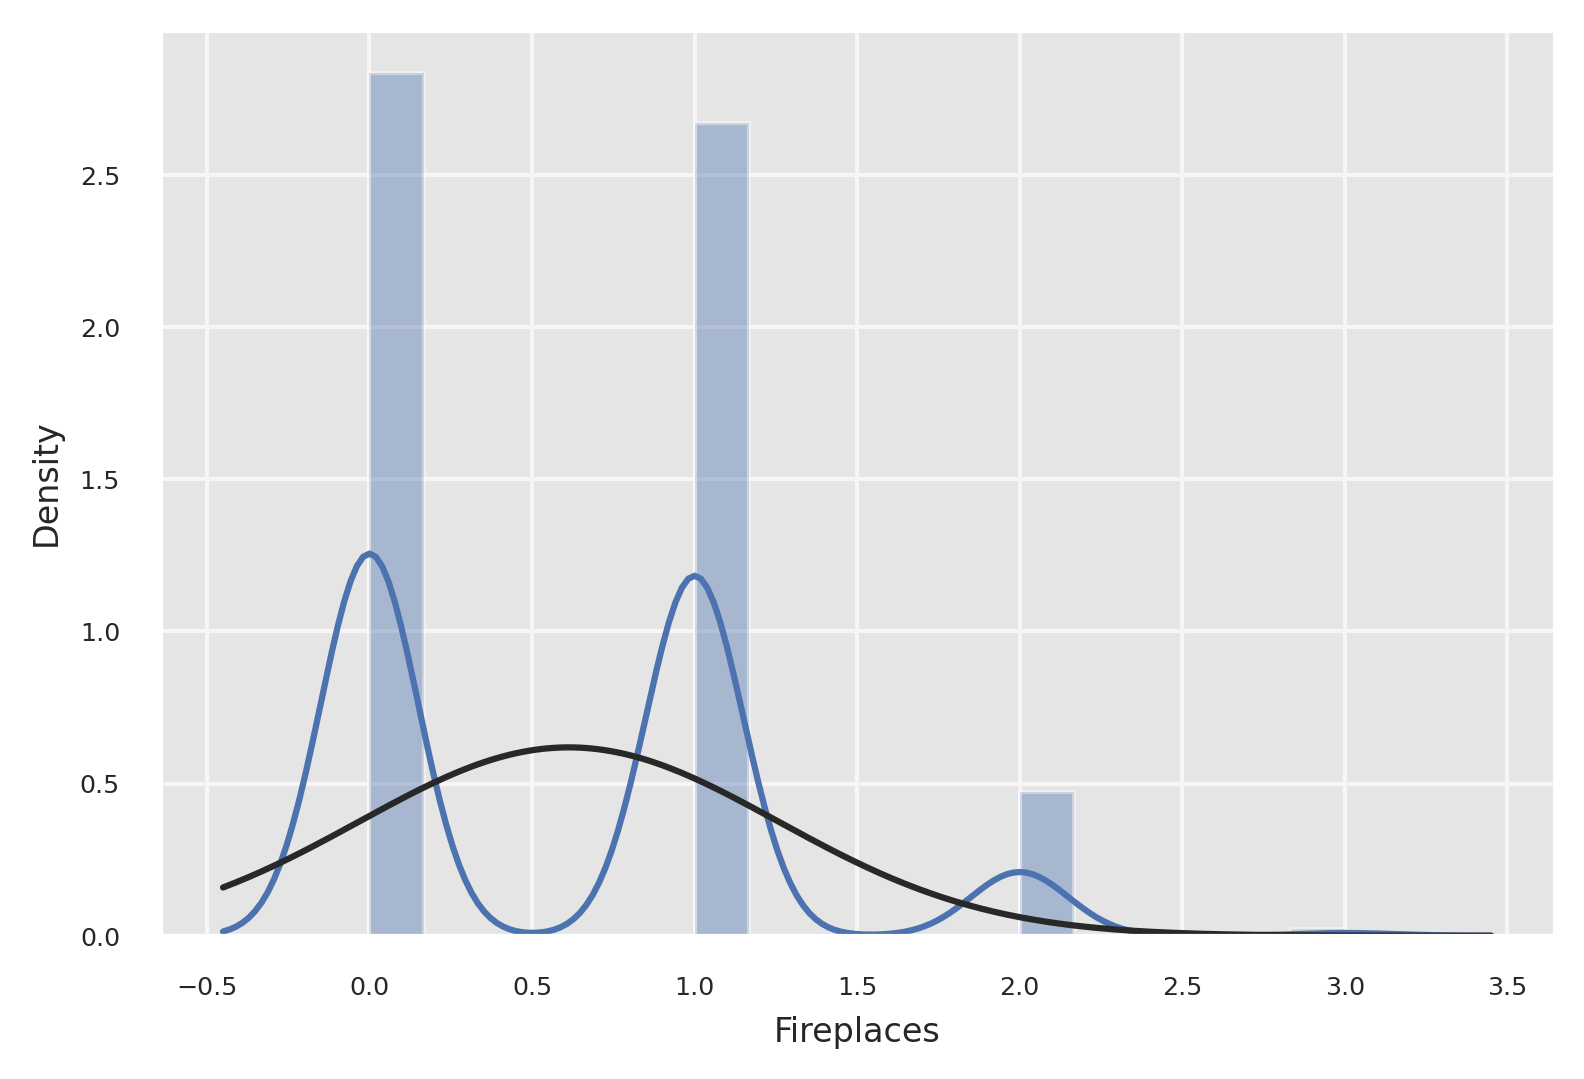

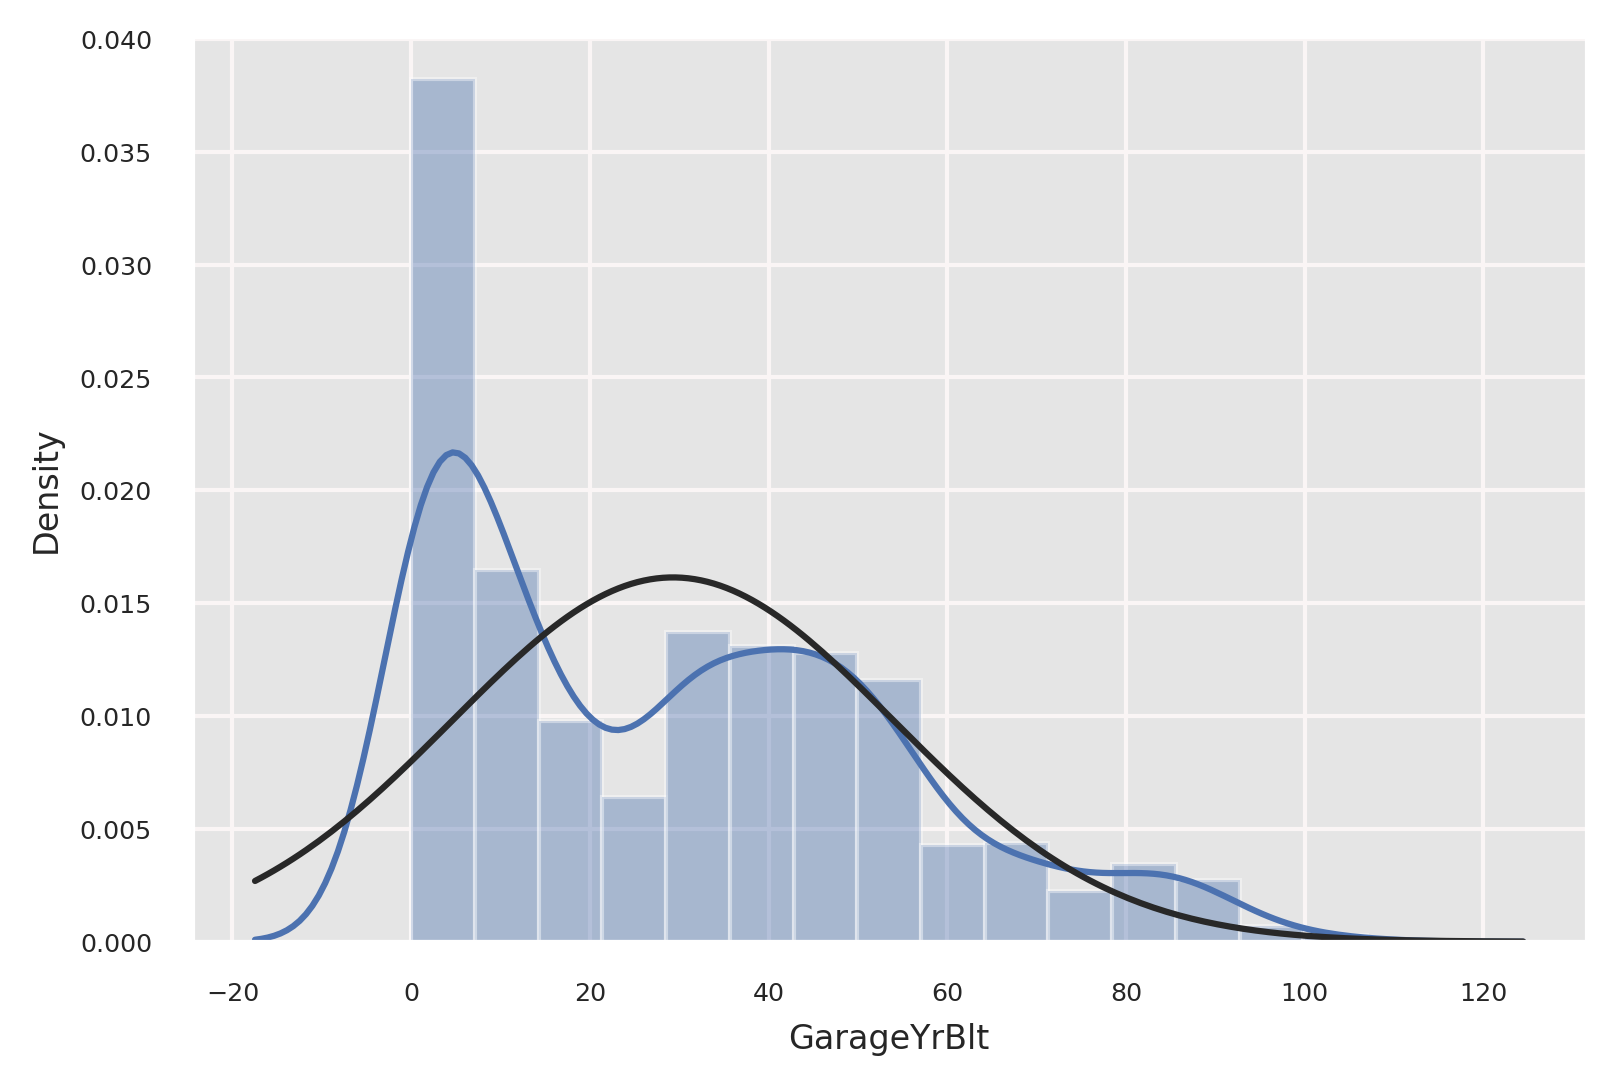

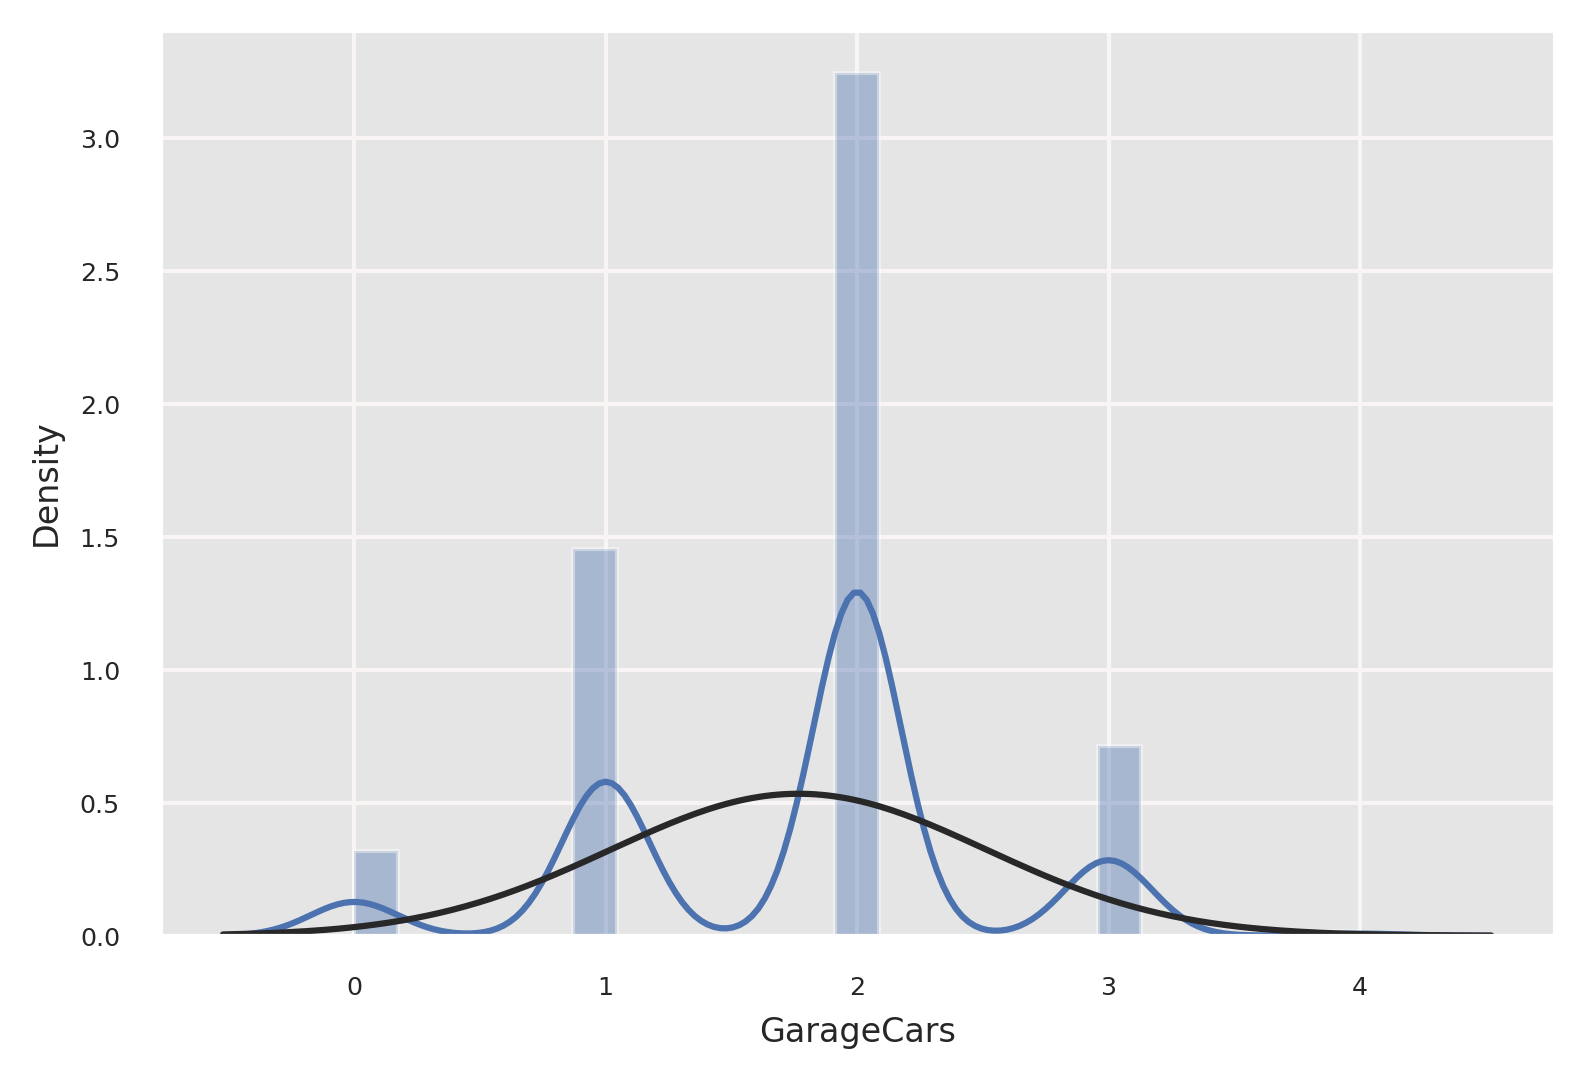

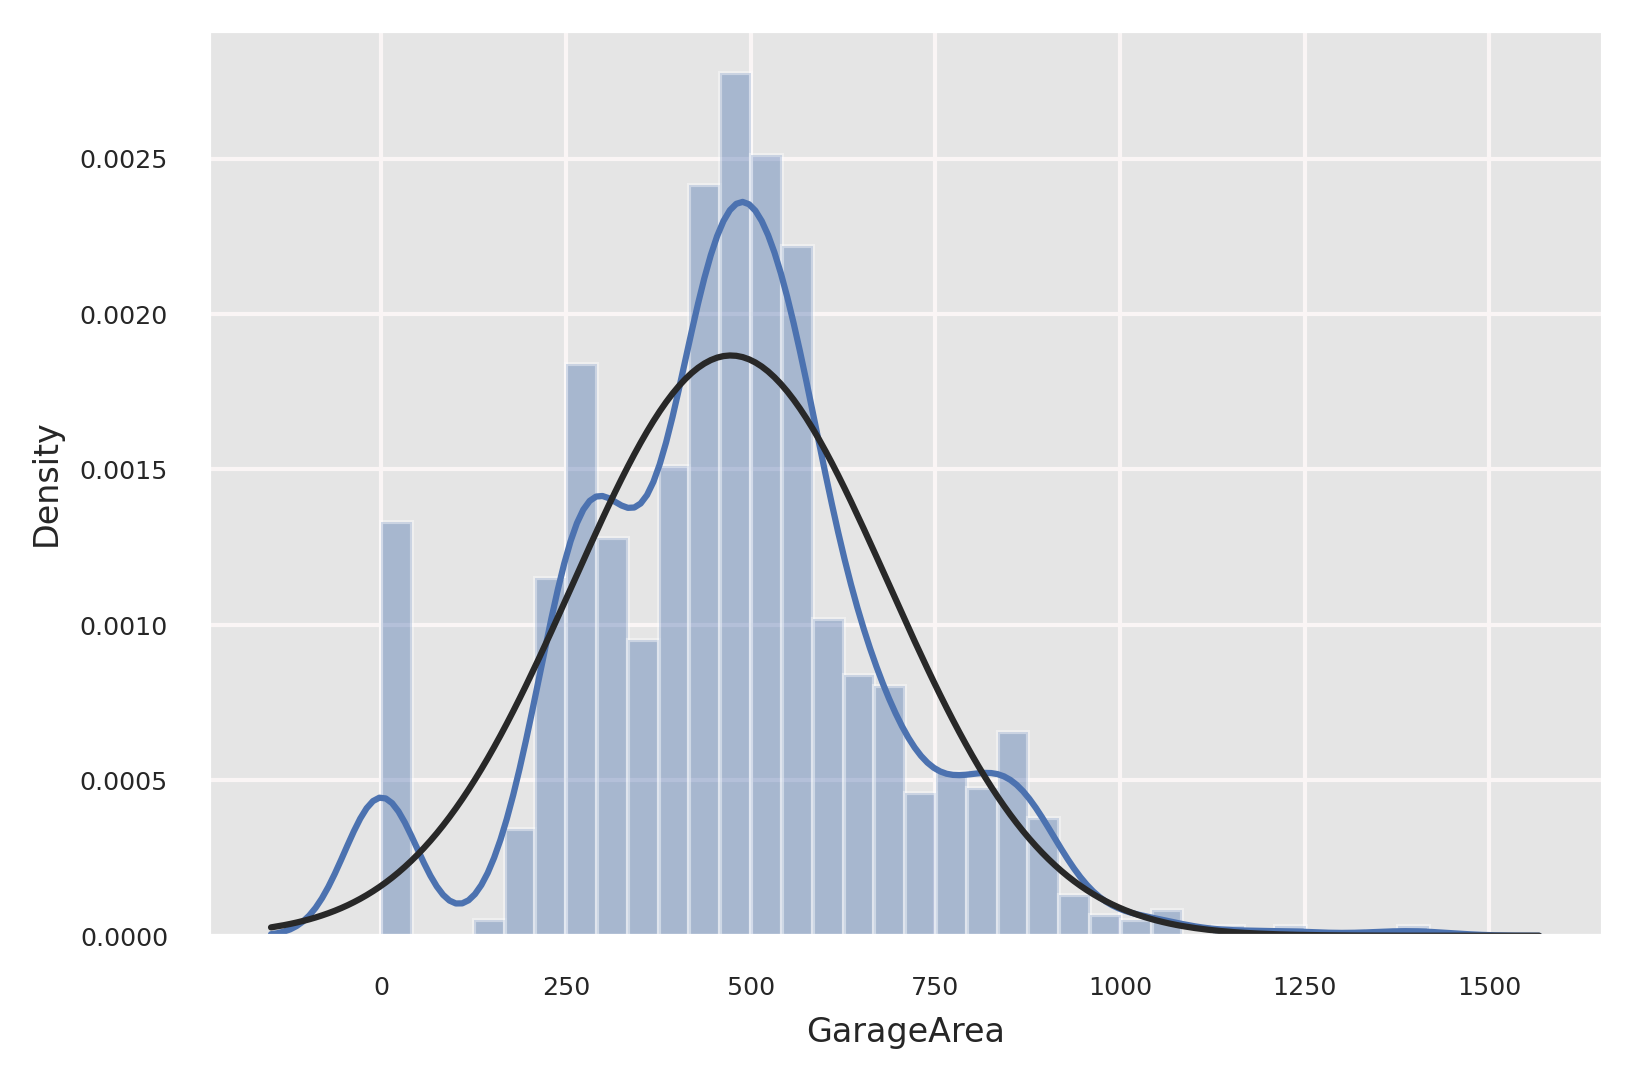

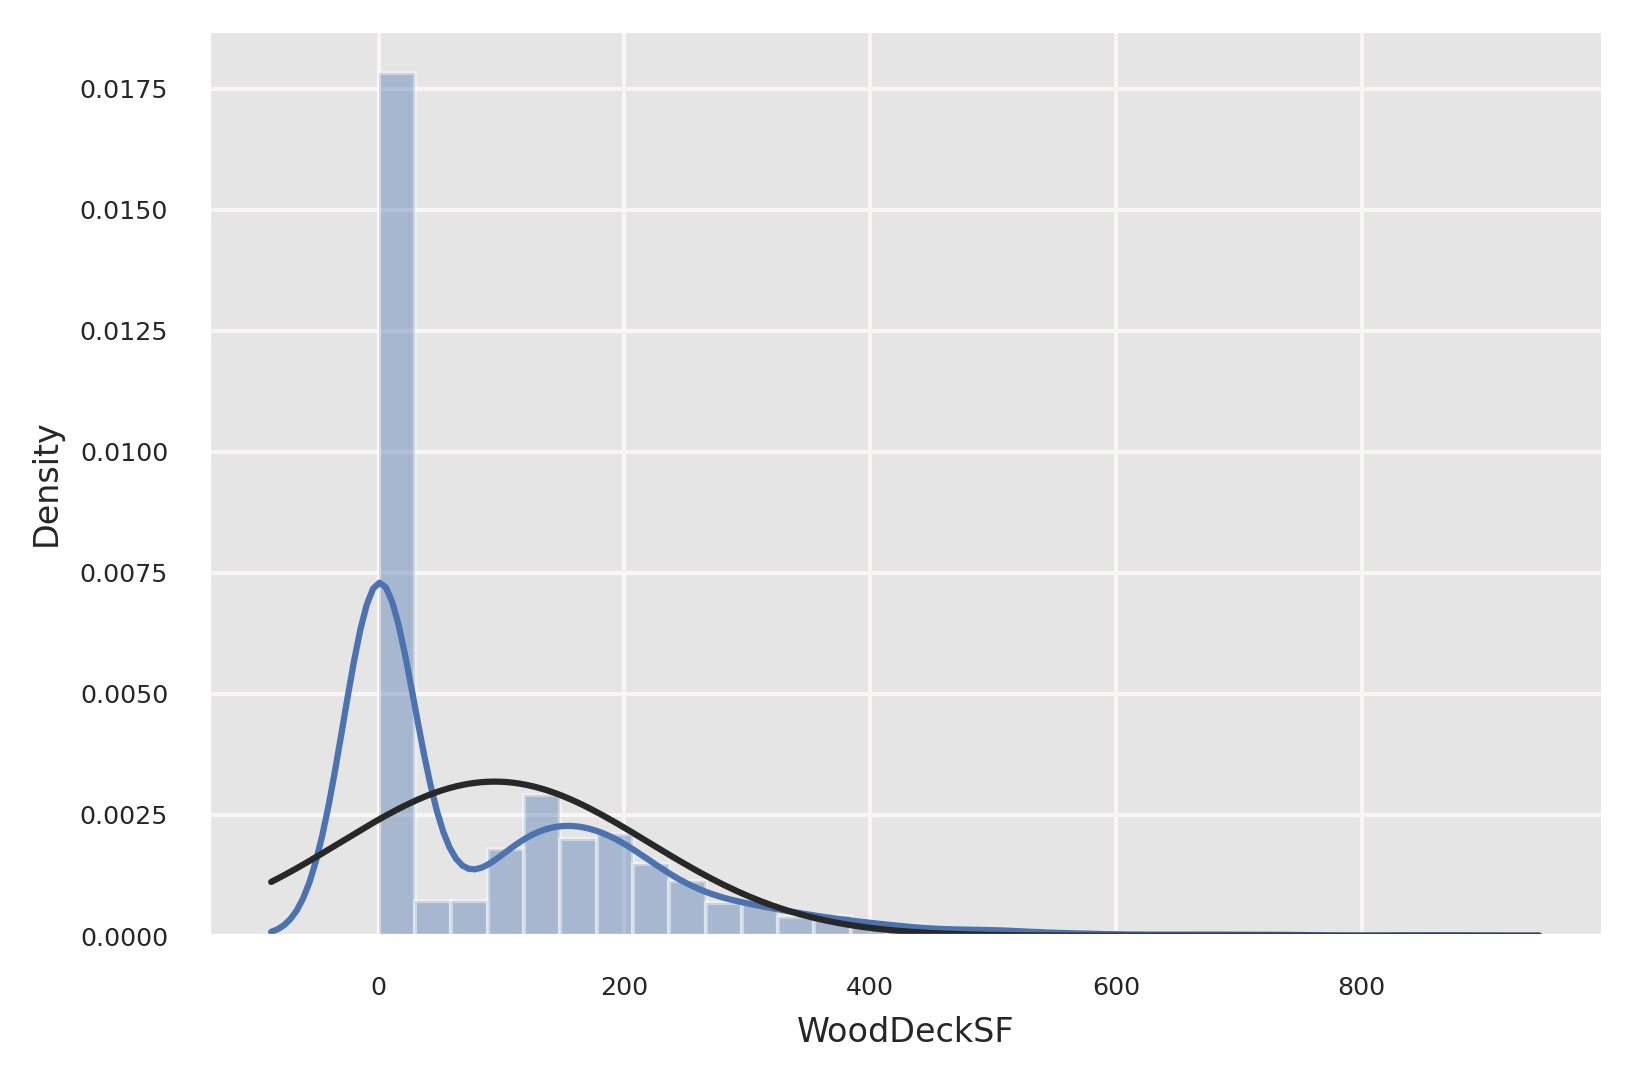

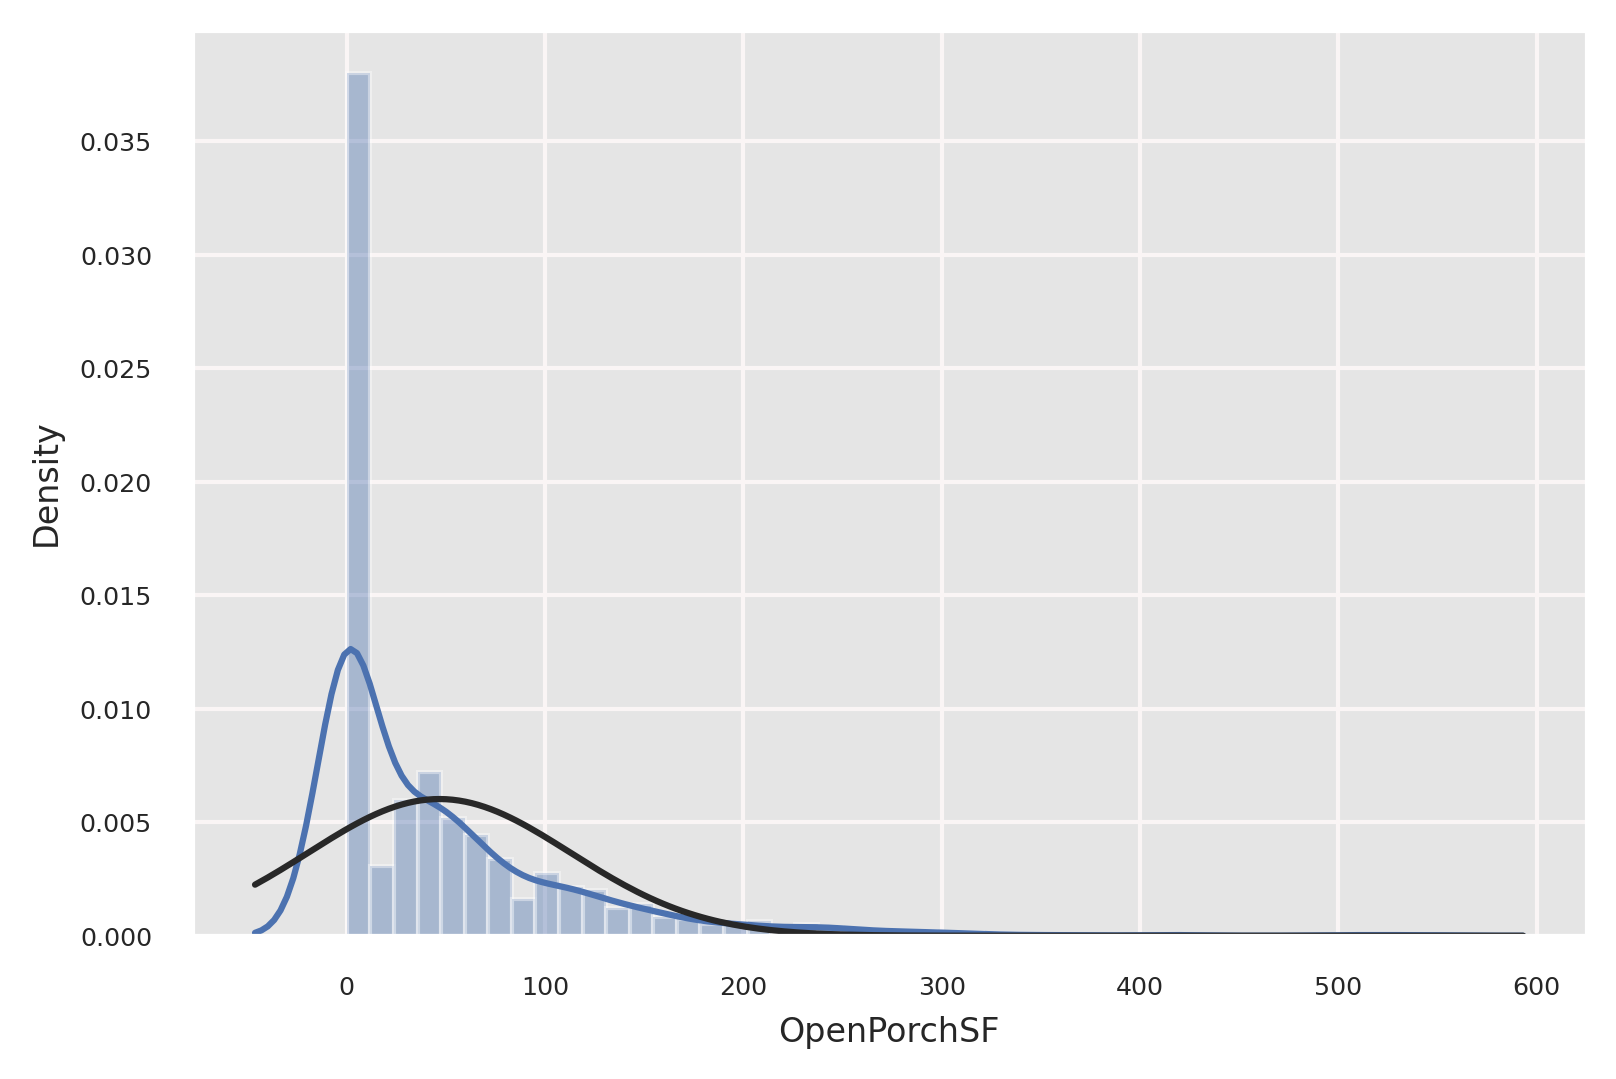

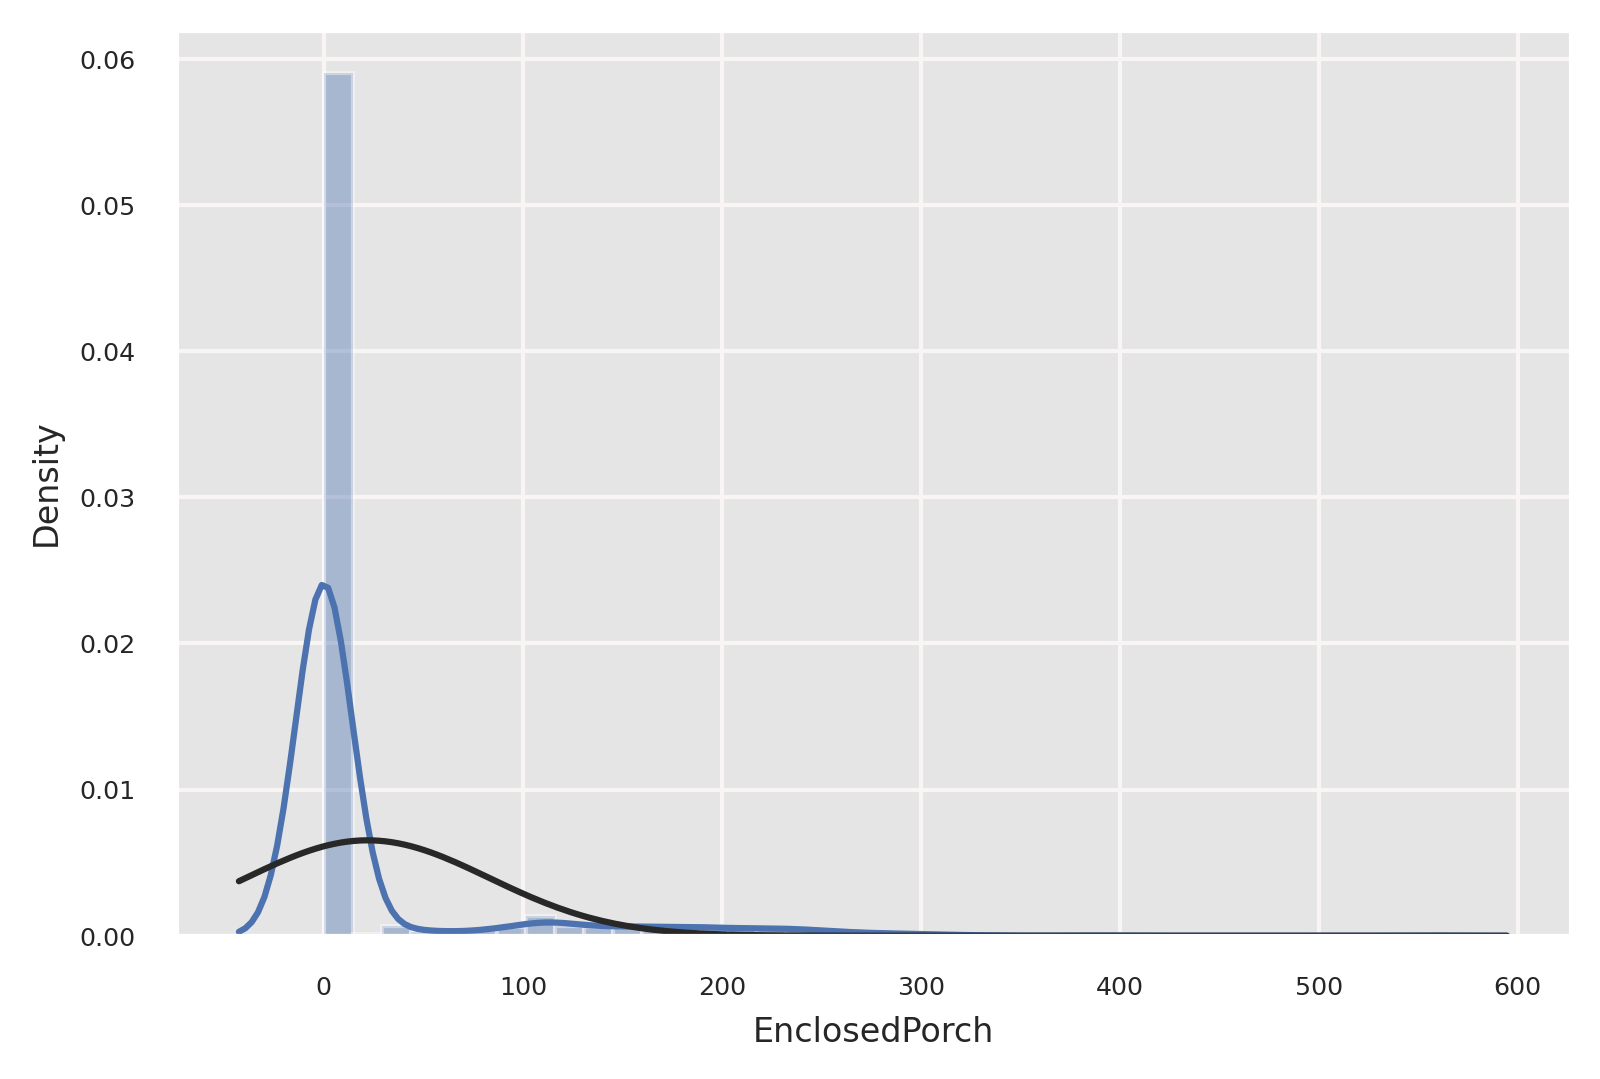

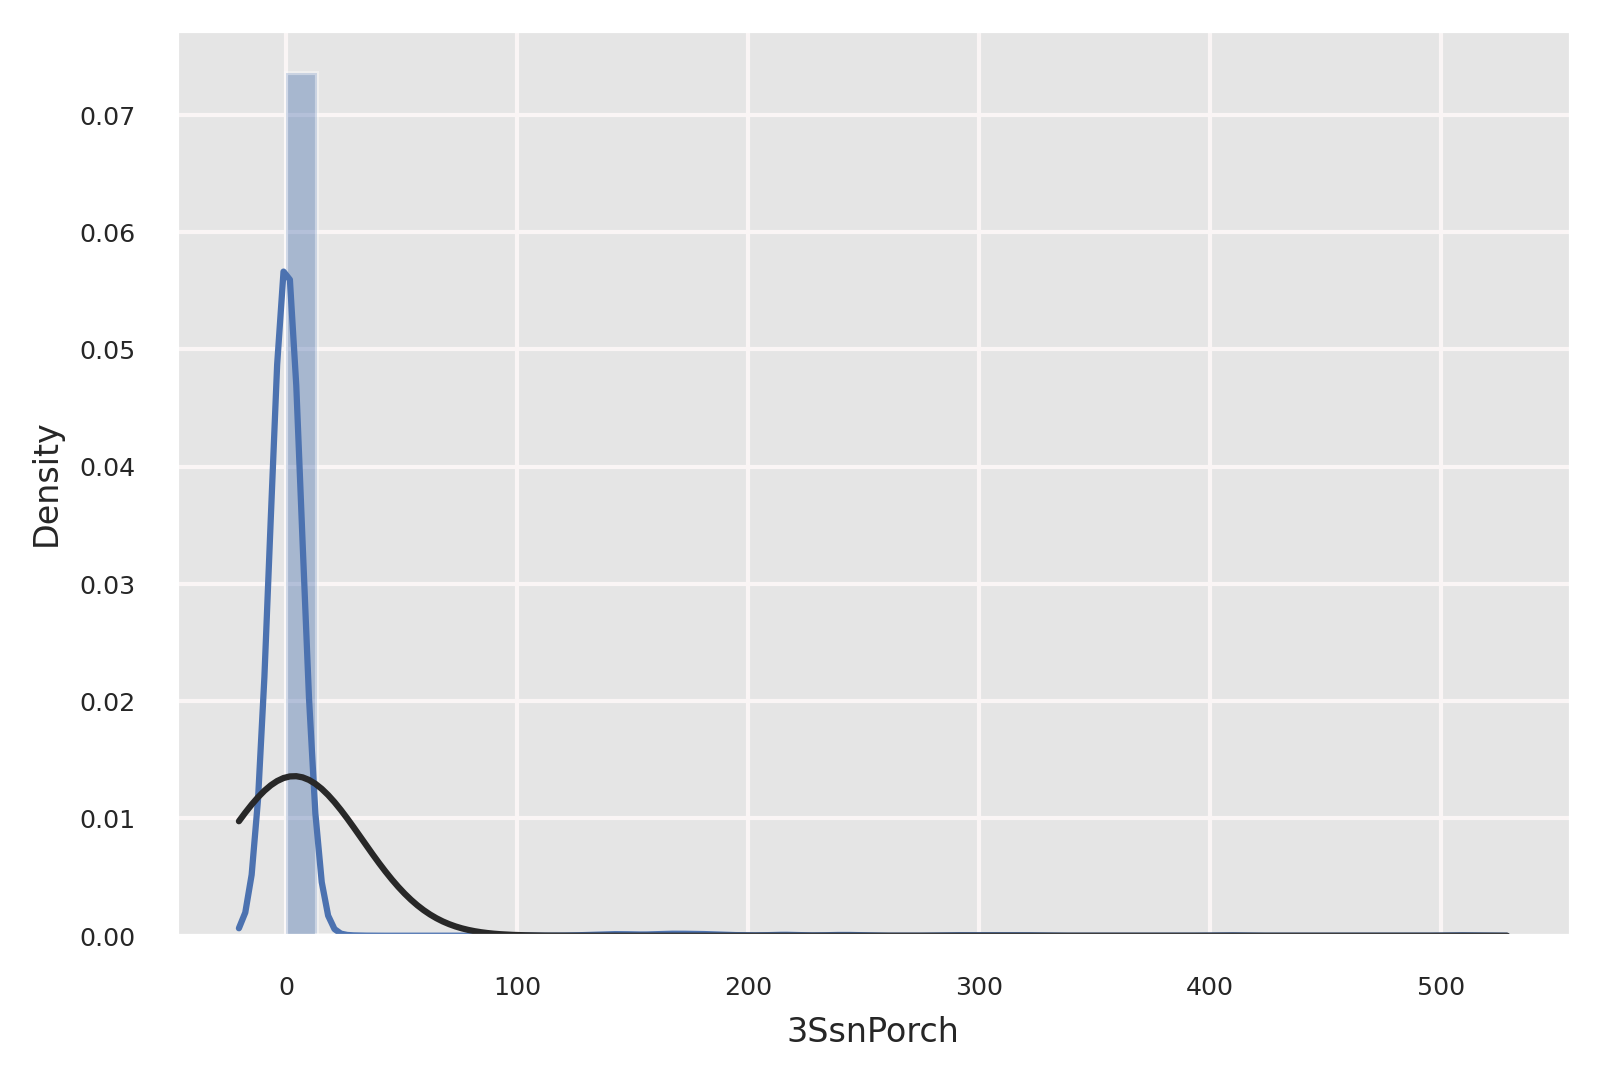

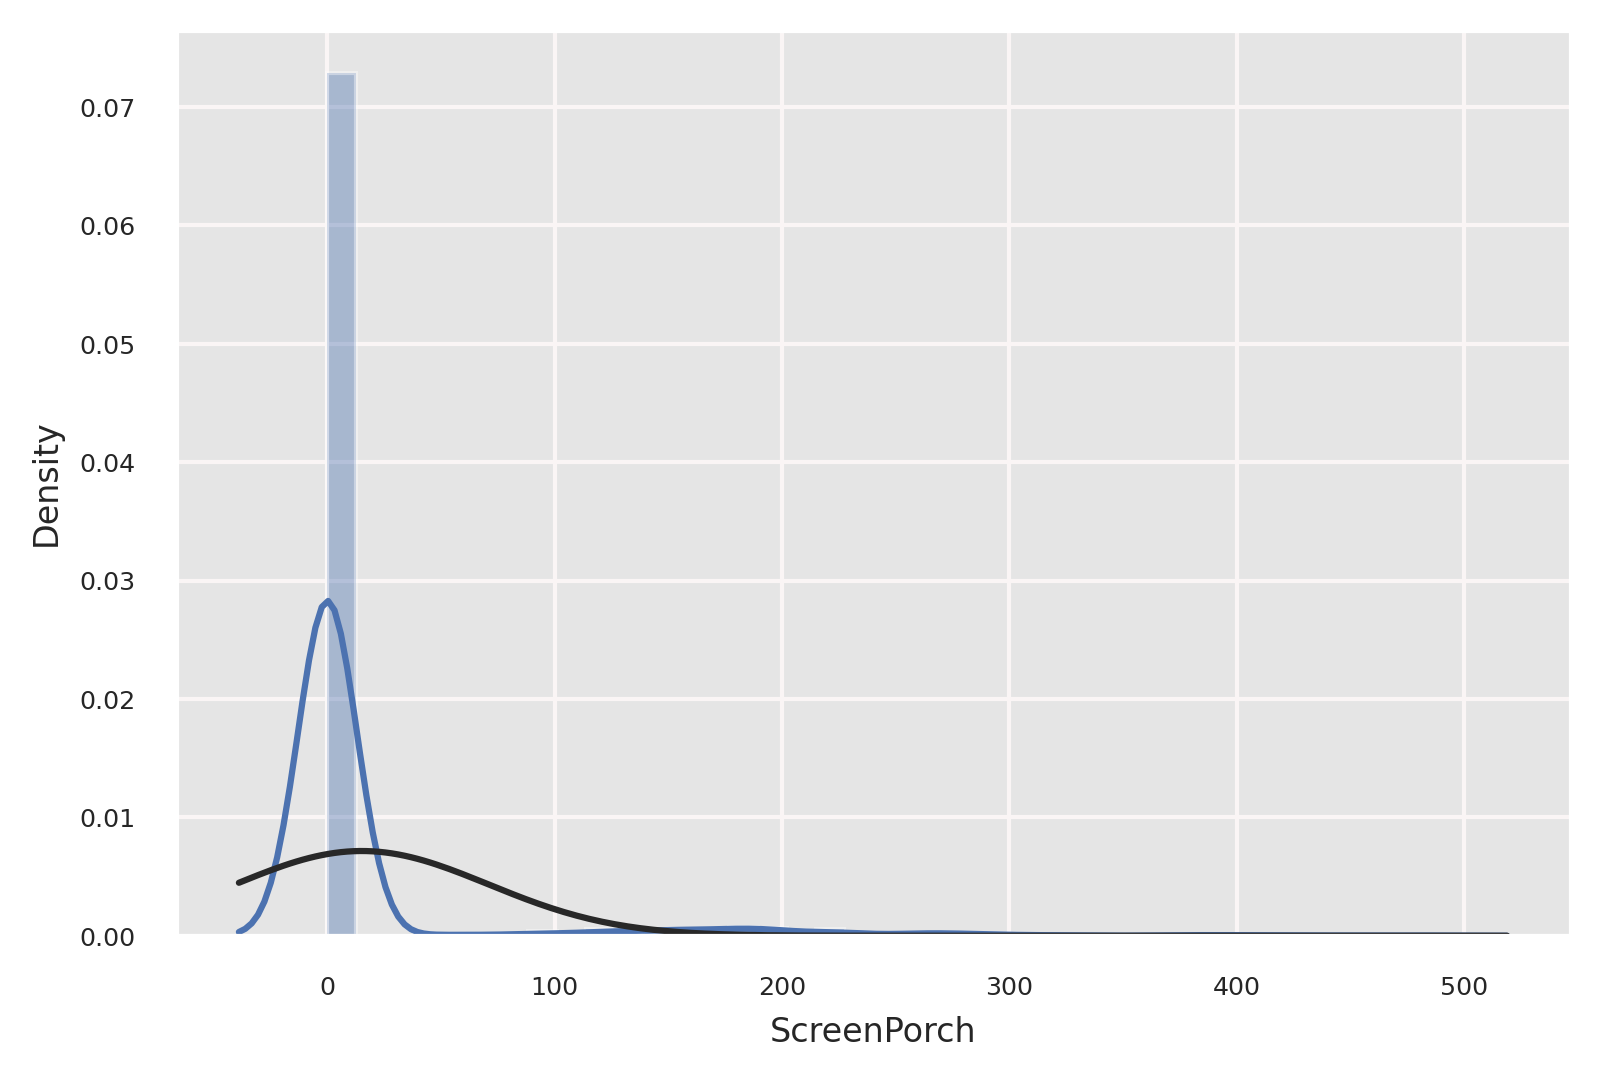

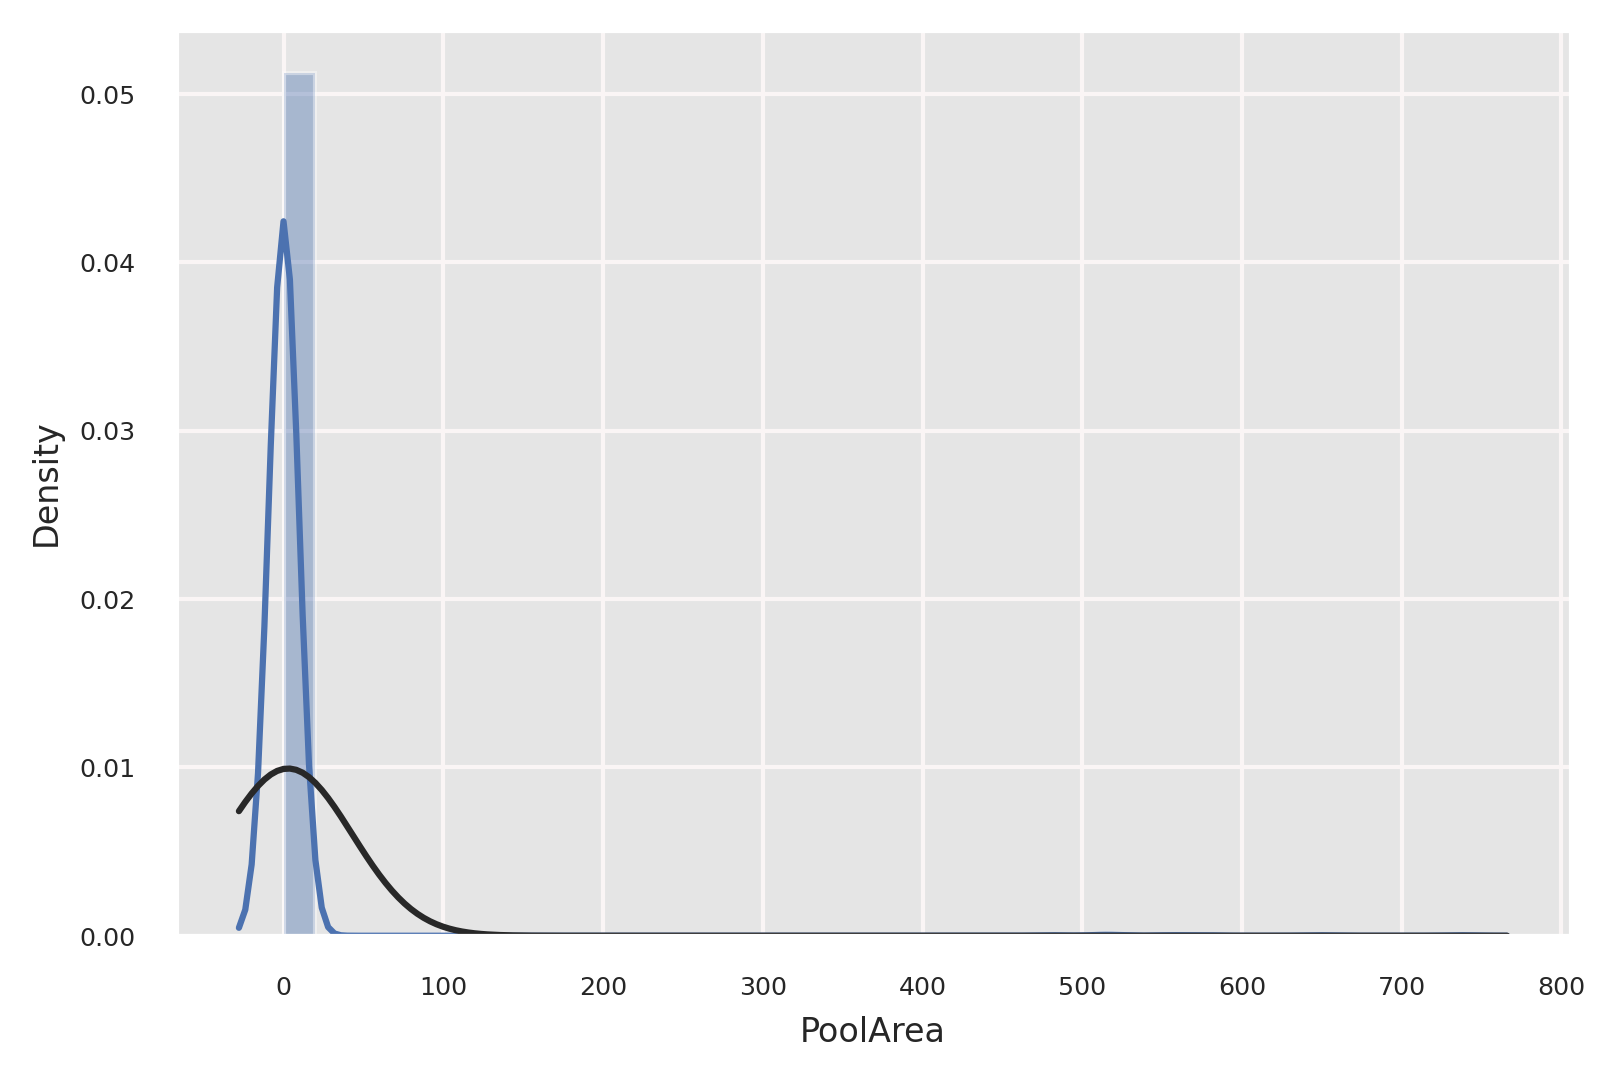

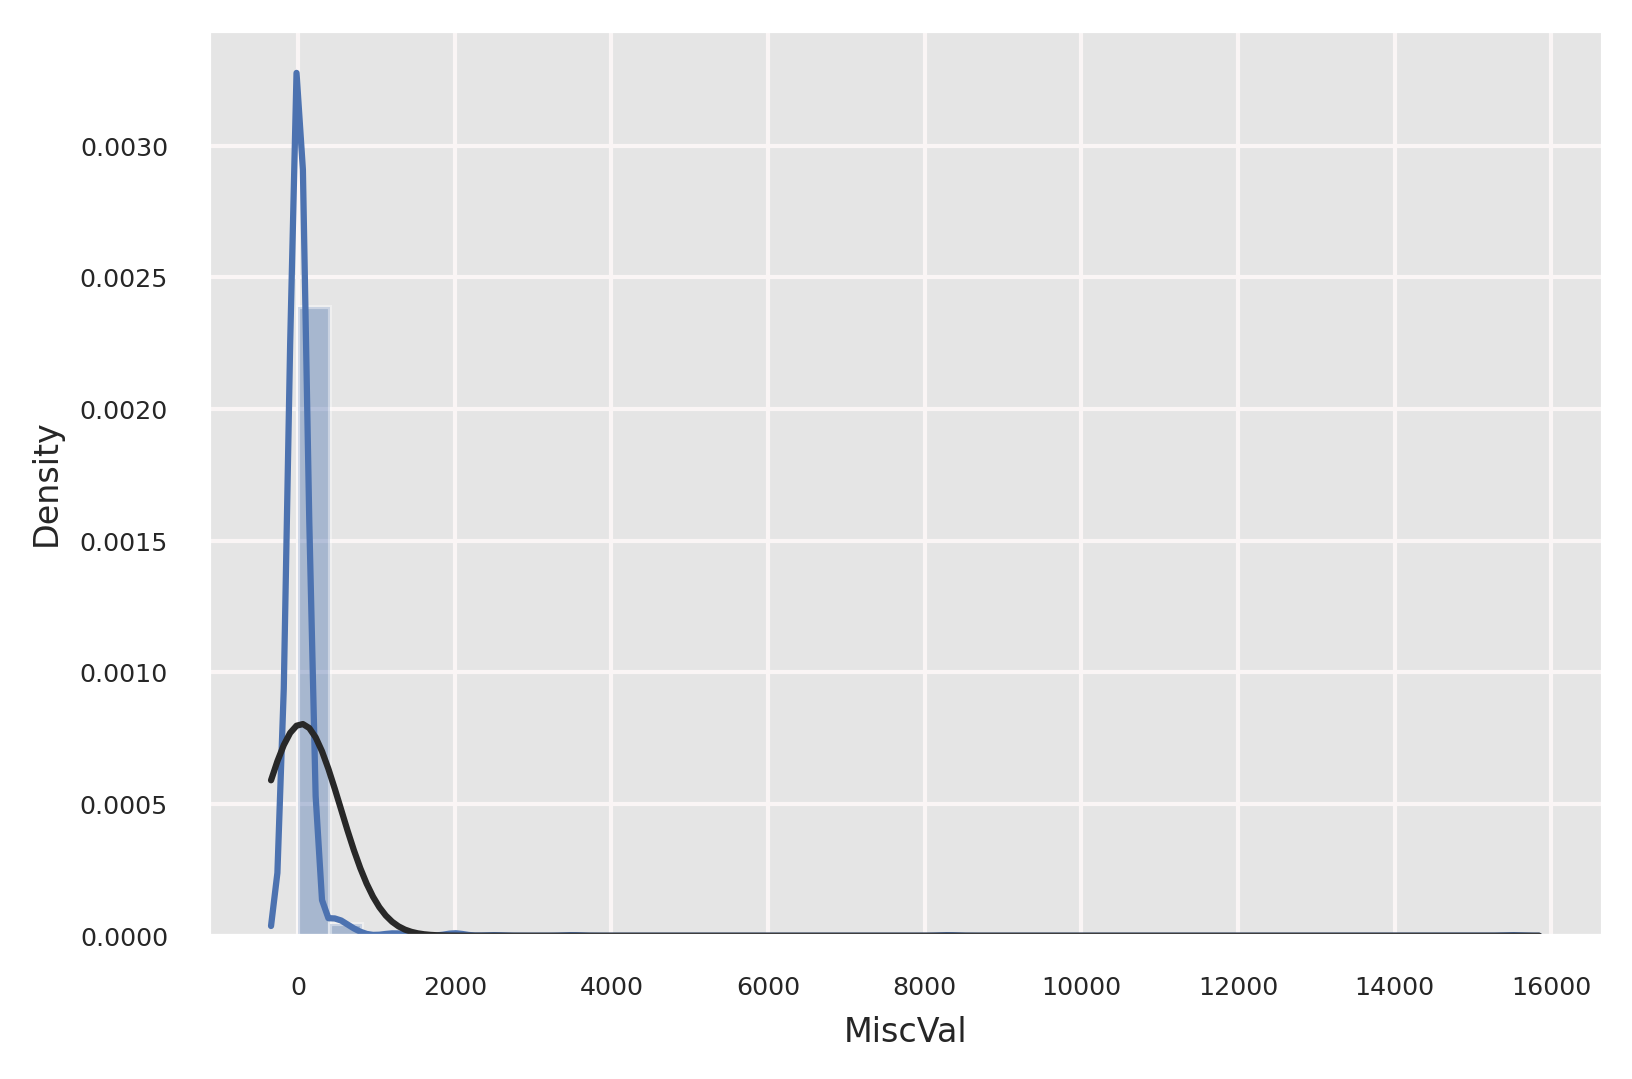

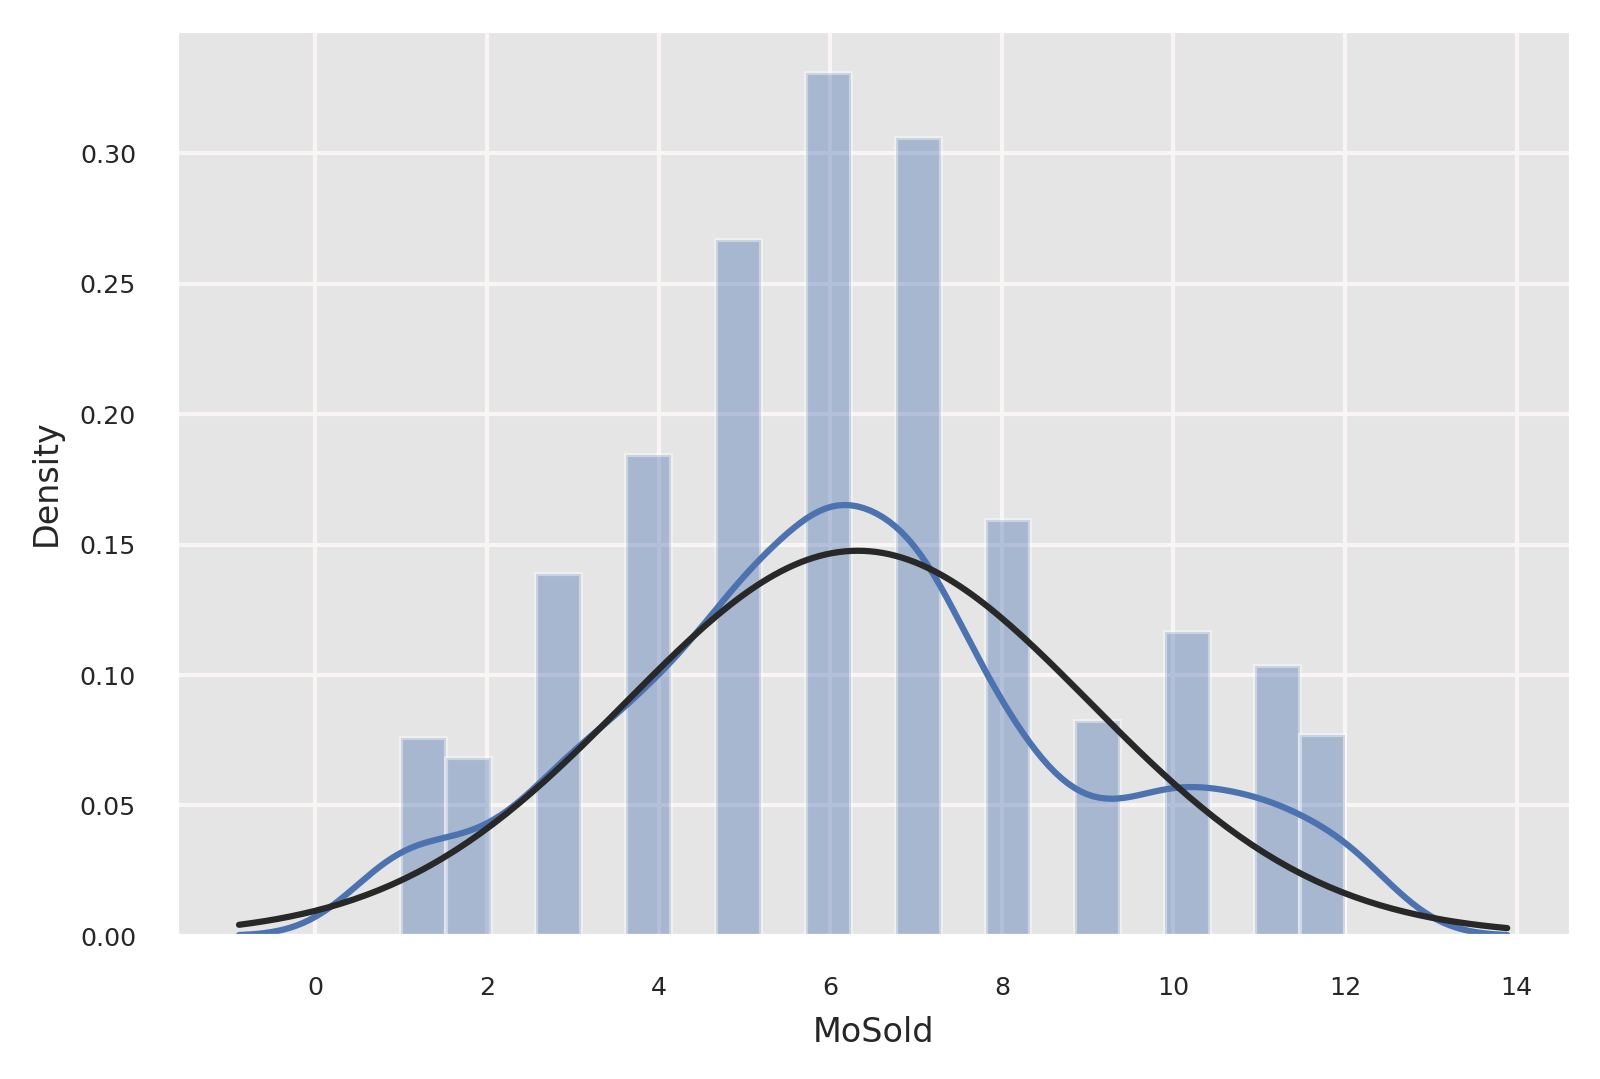

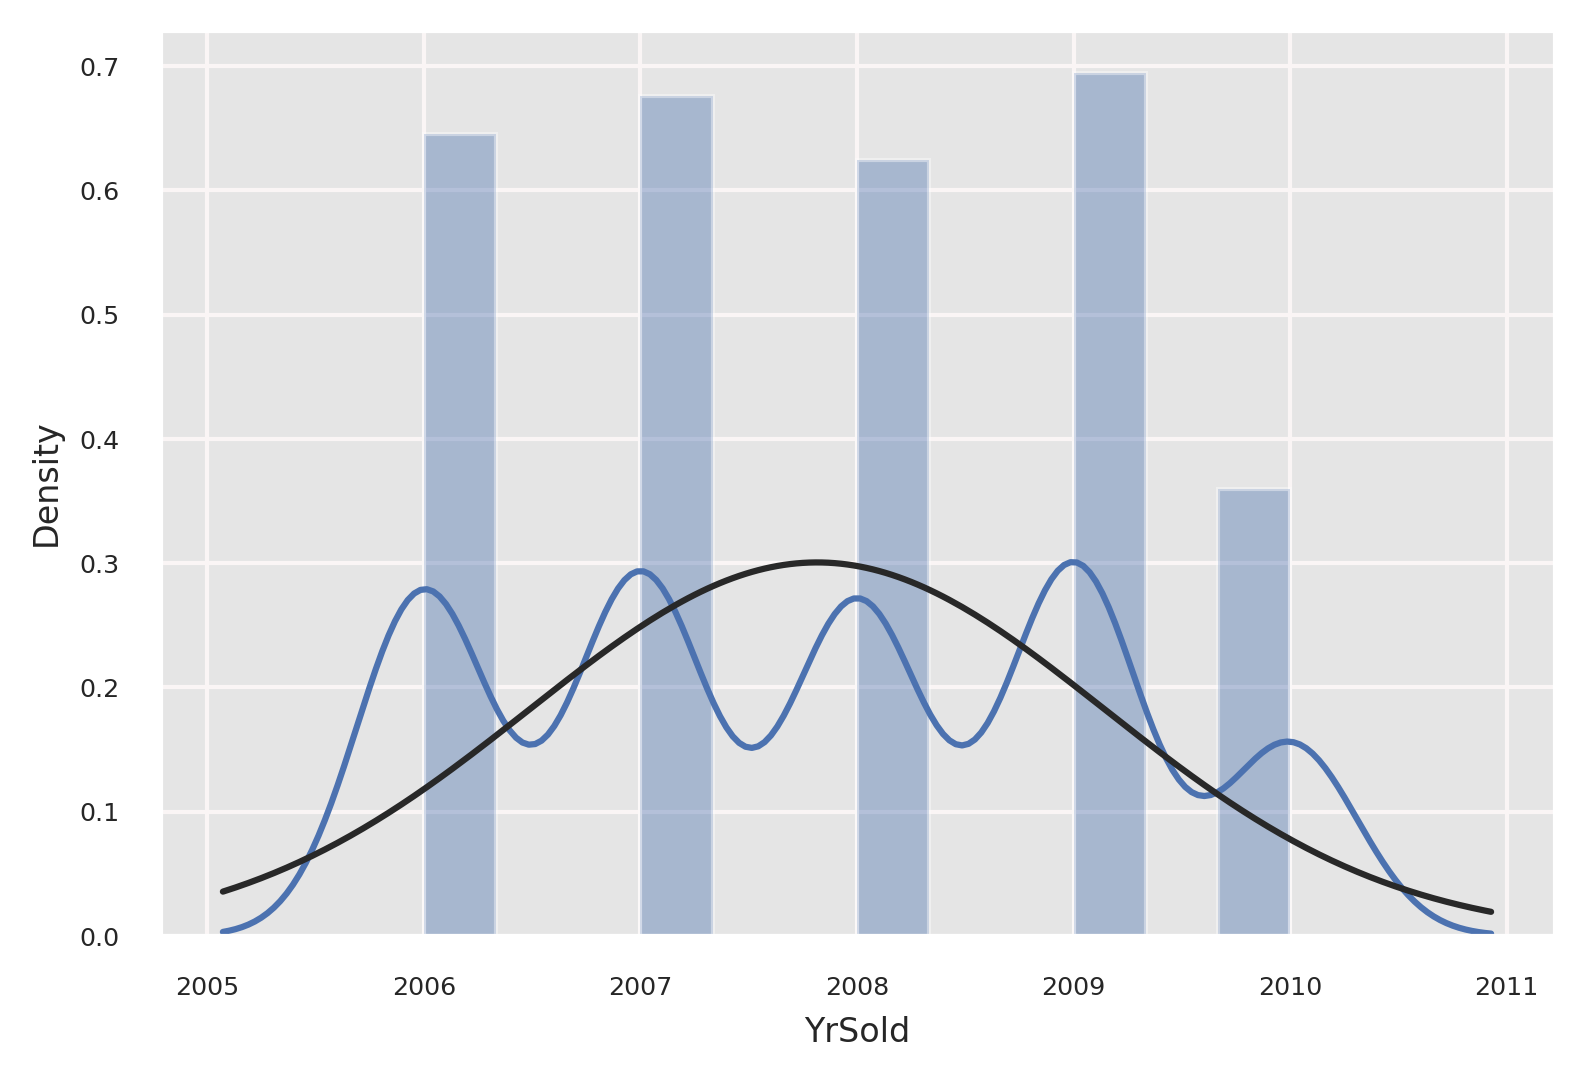

In [ ]:
sns.set_theme(rc = {'figure.dpi': 300, 'axes.labelsize' : 8, 
                    'axes.facecolor': '#E5E5E5', 'grid.color': '#faf5f5'}, 
                    font_scale = 0.55)

for i, feature in enumerate(numeric_feats):
    plt.figure(i)
    sns.distplot(df[feature], fit=norm)

In [ ]:


skewed_feats = df[numeric_feats].apply(lambda x: skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index



In [ ]:
df[numeric_feats] = df[numeric_feats].fillna(df[numeric_feats].median())
df = df.fillna("Unavailable")
df[skewed_feats] = np.log1p(df[skewed_feats])

encoder = OneHotEncoder(handle_unknown="ignore")
train_data = encoder.fit_transform(df)

In [ ]:
def rmsle_cv(model):
    kf = KFold(
        n_splits=5,
        shuffle=True,
        random_state=42).get_n_splits(df)

    rmse = np.sqrt(-cross_val_score(
        model,
        df,
        price,
        scoring="neg_mean_squared_error",
        cv = kf)
    )
    return rmse

In [ ]:
test_df = change_dates(test_set)
test_df[numeric_feats] = test_df[numeric_feats].fillna(test_df[numeric_feats].mean())
test_df = test_df.fillna("Unavailable")
test_df[skewed_feats] = np.log1p(test_df[skewed_feats])
test_data = encoder.transform(test_df)

In [ ]:
lin_selector = SelectFromModel(
    estimator=LinearRegression(),
    threshold='0.5*mean'
)
lin_selector.fit(train_data, price)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='0.5*mean')

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(lin_selector.transform(train_data), price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:


rmsle_cv(linear_reg)



array([nan, nan, nan, nan, nan])

In [ ]:
predicted_linear_reg = linear_reg.predict(lin_selector.transform(test_data))
pd.DataFrame({'id': test_set['Id'], 'SalePrice': np.expm1(predicted_linear_reg)}).head(10)

,id,SalePrice
0,1461,118270.012614
1,1462,158908.118080
2,1463,178217.517071
3,1464,197043.578145
4,1465,201636.119279
5,1466,165463.924623
6,1467,173777.284863
7,1468,183008.784027
8,1469,170379.696686
9,1470,136671.892277


In [ ]:
print("Mean squared Log Error using Linear Regression on Test Set:", root(mean_squared_log_error(np.log1p(sample["SalePrice"]), predicted_linear_reg)))

Mean squared Log Error using Linear Regression on Test Set: 0.029959711714461268


In [ ]:
lasso = LassoCV(alphas = [0.0003])
lasso.fit(train_data, price)

LassoCV(alphas=[0.0003], copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
rmsle_cv(lasso)

array([nan, nan, nan, nan, nan])

In [ ]:
predicted_lasso = lasso.predict(test_data)
pd.DataFrame({'id': test_set['Id'], 'SalePrice': np.expm1(predicted_lasso)}).head(10)

,id,SalePrice
0,1461,122267.271767
1,1462,152592.827832
2,1463,171639.693597
3,1464,199035.768920
4,1465,199164.001583
5,1466,172347.074059
6,1467,175994.805931
7,1468,172264.926057
8,1469,177010.845077
9,1470,129778.628651


In [ ]:
print("Mean squared Log Error using Lasso on Test Set:", root(mean_squared_log_error(np.log1p(sample["SalePrice"]), predicted_lasso)))

Mean squared Log Error using Lasso on Test Set: 0.029472557686809057


In [ ]:


ridge = Ridge(alpha=10, solver="auto")
ridge.fit(train_data, price) 



Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:


rmsle_cv(ridge)



array([nan, nan, nan, nan, nan])

In [ ]:
predicted_ridge = ridge.predict(test_data)
pd.DataFrame({'id': test_set['Id'], 'SalePrice': np.expm1(predicted_ridge)}).head(10)

,id,SalePrice
0,1461,121001.747424
1,1462,153839.985298
2,1463,179734.970396
3,1464,203019.384705
4,1465,192698.889059
5,1466,166275.145036
6,1467,170385.807905
7,1468,176340.315915
8,1469,175359.083380
9,1470,134010.715462


In [ ]:
print("Mean squared Log Error using Ridge on Test Set:", root(mean_squared_log_error(np.log1p(sample["SalePrice"]), predicted_ridge)))

Mean squared Log Error using Ridge on Test Set: 0.02900723040077508


In [ ]:
elastic_net = ElasticNetCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1, 0.0005, 0.0003, 0.005], random_state=0)
elastic_net.fit(train_data, price)

ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1, 0.0005, 0.0003, 0.005], copy_X=True,
             cv=5, eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
             verbose=0)

In [ ]:


rmsle_cv(elastic_net)



array([nan, nan, nan, nan, nan])

In [ ]:
predicted_elastic = elastic_net.predict(test_data)
pd.DataFrame({'id': test_set['Id'], 'SalePrice': np.expm1(predicted_elastic)}).head(10)

,id,SalePrice
0,1461,121692.295239
1,1462,150387.053774
2,1463,174894.349137
3,1464,200038.841825
4,1465,204543.057113
5,1466,174967.634704
6,1467,179833.825090
7,1468,173455.522055
8,1469,178773.628860
9,1470,129034.494036


In [ ]:
print("Mean squared Log Error using Elastic Net on Test Set:", root(mean_squared_log_error(np.log1p(sample["SalePrice"]), predicted_elastic)))

Mean squared Log Error using Elastic Net on Test Set: 0.029022596647691797
